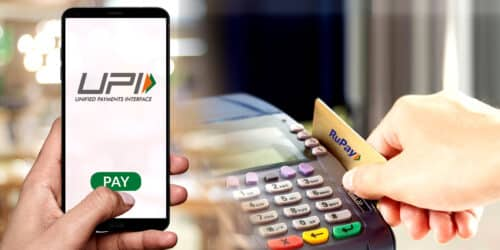

In [1]:
from IPython.display import Image
Image(filename ='E:/PIP_Devmallya/Week_1/Problem_2/UPI-and-Rupay-Card.jpg', width = 800, height = 200)

# Problem Description:

Prepare a Machine Learning Model to predict the Persistency 13M Payment Behaviour at the New Business stage.

# Objective:

Using Machine Learning techniques, provide scores for each policy at the New Business stage the likelihood to pay the 13M premium.

Identify the segments where maximum non payers are captured.

# Dataset:

“Training” & “Test” Dataset with the raw input attributes and the 13M actual paid/not paid flag.

“Out of Time” Datasets would be provided with just the raw input attributes.

# Expected Steps:

 Conduct appropriate Data Treatments for e.g. Missing Value Imputation, Outlier treatment etc.
 
 Conduct required Feature Engineering for e.g. Binning, Ratio, Interaction, Polynomial  etc.
 
 Use any machine learning algorithm or combination of machine learning algorithms you deem fit.
 
 Prepare your model on the Train Data and you can evaluate the generalization capability of your model by using K-Fold Cross Validation, Leave One Out.
 
 Cross Validation or any other validation technique that you see appropriate.
 
 Score the Test and Out of Time Data and share it back to us along with the scored Train Data for evaluation. Also share all the Model Codes.

# 1. Import the Dependencies 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
%matplotlib inline
sns.set(style='darkgrid')
warnings.filterwarnings('ignore')

# 2. Load the Dataset

By giving a parameter value for the file name (e.g. pd. read csv("filename. csv")), we may import tabular data from CSV files into pandas dataframes using the pandas package's read csv() method. Remember that we gave pandas an alias (pd), so will'll be calling pandas functions with pd.

In [3]:
df_train = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_2/train.csv')
df_train.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37,VAR38
0,19981651,0.8773,Ghaziabad - Rajnagar,NaN,622010.0,77.0,Y,NaN,0.0,HDFC BANK,...,0,Resident Indian,14.0,1,NaN,Uttar Pradesh,HDFC BANK,7901018.0,North 2,1
1,20524842,93.47,Delhi - Asaf Ali Road,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,...,1,Resident Indian,40.0,1,N,Karnataka,HDFC BANK,10000000.0,North 1,1
2,20360827,86.61,Mumbai - Corporate,Y,27426.0,99.0,N,20.83070,18000000.0,EDM,...,1,Resident Indian,30.0,1,N,Maharashtra,EDM,30000000.0,NaN,1
3,21025282,NaN,Mumbai - Borivali,NaN,33493.0,3.0,Y,NaN,350000.0,Other Banks & CA,...,0,Resident Indian,12.0,0,NaN,Maharashtra,Ratnakar Bank,212857.0,West,1
4,19982717,0.8307,Mumbai - Corporate,NaN,12335.0,32.0,N,NaN,58326.0,HDFC BANK,...,0,Resident Indian,10.0,1,NaN,Maharashtra,HDFC BANK,116653.0,NaN,1


In [4]:
# Check the shape of the train data
df_train.shape

(100000, 38)

In [5]:
df_test = pd.read_csv('E:/PIP_Devmallya/Week_1/Problem_2/test.csv')
df_test.head()

,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,VAR8,VAR9,VAR10,...,VAR28,VAR29,VAR30,VAR31,VAR32,VAR33,VAR34,VAR35,VAR36,VAR37
0,20692051,86.61,Mumbai - Corporate,N,33000,99.0,N,28.06642,11000000.0,EDM,...,2018-04-09,1,Resident Indian,37,1,N,Karnataka,EDM,11000000.0,NaN
1,19931311,NaN,Karnal - Narayan Plaza,N,99999,11.0,N,21.79931,999990.0,HDFC BANK,...,2017-12-30,0,Resident Indian,10,1,N,Haryana,HDFC BANK,1999980.0,North 1
2,19965894,NaN,Pune City Mall,N,60000,22.0,Y,21.30395,600000.0,HDFC BANK,...,2018-10-01,0,Resident Indian,10,1,N,Maharashtra,HDFC BANK,1200000.0,West
3,20976831,86.61,Mumbai - Corporate,N,6595,107.0,N,30.04082,5000000.0,EDM,...,2018-12-18,1,Resident Indian,50,1,N,Gujarat,EDM,5000000.0,NaN
4,20270101,0.9099,Mumbai - Corporate,Y,25323,64.0,N,24.93372,13180982.0,HDFC BANK,...,2018-03-31,1,Resident Indian,31,1,N,Karnataka,OL-HDFC BANK,11017014.0,NaN


In [6]:
# Check the shape of the test data
df_test.shape

(30000, 37)

In [7]:
dic = pd.read_excel('E:/PIP_Devmallya/Week_1/Problem_2/Data_Dictionary.xlsx')
dic.head()

,Variable Flag,Variable Detail
0,VAR1,Masked Policy Identifier
1,VAR2,Mapped Agent 13M Persistency
2,VAR3,Mapped Agent Branch
3,VAR4,Application Life Assured Alcohol Declaration
4,VAR5,Applicant's Policy Annualized Premium


In [8]:
dic.tail()

,Variable Flag,Variable Detail
33,VAR34,Application Life Assured State
34,VAR35,Application Sourcing Sub Channel
35,VAR36,Applicant's Policy Sum Assured
36,VAR37,HDFC Life Operational Zone
37,VAR38,Target - Paid Premium Within 90 Days of Due Da...


## 2.2 Rename the columns for both train and test dataset

In [9]:
# Check the columns of the training data
df_train.columns

Index(['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7', 'VAR8', 'VAR9',
       'VAR10', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17',
       'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23', 'VAR24', 'VAR25',
       'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR31', 'VAR32', 'VAR33',
       'VAR34', 'VAR35', 'VAR36', 'VAR37', 'VAR38'],
      dtype='object')

In [10]:
# Rename the columns for train
df_train = df_train.rename(columns={"VAR1": "Masked Policy Identifier", "VAR2": "Mapped Agent 13M Persistency", "VAR3": "Mapped Agent Branch", "VAR4": "Application Life Assured Alcohol Declaration", "VAR5": "Applicant's Policy Annualized Premium",
                                   "VAR6": "Mapped Agent Vintage", "VAR7": "Auto Debit of Premium Opted Flag(Yes/No)", "VAR8": "Application Life Assured BMI", "VAR9": "Total Risk Exposure of HDFC Life w.r.t. Life Assured", "VAR10": "Application  Sourcing Channel",
                                   "VAR11": "Application  Life Assured City", "VAR12": "Applicant's  Policy Contract Branch", "VAR13": "Application  Life Assured City Tier", "VAR14": "Application  Life Assured Age", "VAR15": "Application  Life Assured Education",
                                   "VAR16": "Application  Life Assured Gender", "VAR17": "Application  Life Assured Income", "VAR18": "Application  Life Assured Industry", "VAR19": "Application  Life Assured Marital Status", "VAR20": "Application  Life Assured Nationality",
                                   "VAR21": "Application  Life Assured Occupation", "VAR22": "Applicant's Policy PAR/NON PAR/ULIP Tag", "VAR23": "Application Specific Sourcing Partner", "VAR24": "First Premium Payment Type", "VAR25": "Applicant's Policy Product Category",
                                   "VAR26": "Applicant's Policy Premium Payment Frequency", "VAR27": "Applicant's Policy Product Name", "VAR28": "Application Login Date", "VAR29": "Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')", "VAR30" : "Application Life Assured Residential Status",
                                   "VAR31": "Applicant's Policy Risk Cessation Term", "VAR32": "Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')", "VAR33": "Application Life Assured Smoker Declaration", "VAR34": "Application Life Assured State", "VAR35": "Application Sourcing Sub Channel",
                                   "VAR36": "Applicant's Policy Sum Assured", "VAR37": "HDFC Life Operational Zone", "VAR38": "Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')"})
df_train.head()

,Masked Policy Identifier,Mapped Agent 13M Persistency,Mapped Agent Branch,Application Life Assured Alcohol Declaration,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,...,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Application Life Assured Residential Status,Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')"
0,19981651,0.8773,Ghaziabad - Rajnagar,NaN,622010.0,77.0,Y,NaN,0.0,HDFC BANK,...,0,Resident Indian,14.0,1,NaN,Uttar Pradesh,HDFC BANK,7901018.0,North 2,1
1,20524842,93.47,Delhi - Asaf Ali Road,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,...,1,Resident Indian,40.0,1,N,Karnataka,HDFC BANK,10000000.0,North 1,1
2,20360827,86.61,Mumbai - Corporate,Y,27426.0,99.0,N,20.83070,18000000.0,EDM,...,1,Resident Indian,30.0,1,N,Maharashtra,EDM,30000000.0,NaN,1
3,21025282,NaN,Mumbai - Borivali,NaN,33493.0,3.0,Y,NaN,350000.0,Other Banks & CA,...,0,Resident Indian,12.0,0,NaN,Maharashtra,Ratnakar Bank,212857.0,West,1
4,19982717,0.8307,Mumbai - Corporate,NaN,12335.0,32.0,N,NaN,58326.0,HDFC BANK,...,0,Resident Indian,10.0,1,NaN,Maharashtra,HDFC BANK,116653.0,NaN,1


In [11]:
df_train.columns

Index(['Masked Policy Identifier', 'Mapped Agent 13M Persistency',
       'Mapped Agent Branch', 'Application Life Assured Alcohol Declaration',
       'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant's  Policy Contract Branch',
       'Application  Life Assured City Tier', 'Application  Life Assured Age',
       'Application  Life Assured Education',
       'Application  Life Assured Gender', 'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Pa

In [12]:
# Rename the columns for test
df_test = df_test.rename(columns={"VAR1": "Masked Policy Identifier", "VAR2": "Mapped Agent 13M Persistency", "VAR3": "Mapped Agent Branch", "VAR4": "Application Life Assured Alcohol Declaration", "VAR5": "Applicant's Policy Annualized Premium",
                                   "VAR6": "Mapped Agent Vintage", "VAR7": "Auto Debit of Premium Opted Flag(Yes/No)", "VAR8": "Application Life Assured BMI", "VAR9": "Total Risk Exposure of HDFC Life w.r.t. Life Assured", "VAR10": "Application  Sourcing Channel",
                                   "VAR11": "Application  Life Assured City", "VAR12": "Applicant's  Policy Contract Branch", "VAR13": "Application  Life Assured City Tier", "VAR14": "Application  Life Assured Age", "VAR15": "Application  Life Assured Education",
                                   "VAR16": "Application  Life Assured Gender", "VAR17": "Application  Life Assured Income", "VAR18": "Application  Life Assured Industry", "VAR19": "Application  Life Assured Marital Status", "VAR20": "Application  Life Assured Nationality",
                                   "VAR21": "Application  Life Assured Occupation", "VAR22": "Applicant's Policy PAR/NON PAR/ULIP Tag", "VAR23": "Application Specific Sourcing Partner", "VAR24": "First Premium Payment Type", "VAR25": "Applicant's Policy Product Category",
                                   "VAR26": "Applicant's Policy Premium Payment Frequency", "VAR27": "Applicant's Policy Product Name", "VAR28": "Application Login Date", "VAR29": "Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')", "VAR30" : "Application Life Assured Residential Status",
                                   "VAR31": "Applicant's Policy Risk Cessation Term", "VAR32": "Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')", "VAR33": "Application Life Assured Smoker Declaration", "VAR34": "Application Life Assured State", "VAR35": "Application Sourcing Sub Channel",
                                   "VAR36": "Applicant's Policy Sum Assured", "VAR37": "HDFC Life Operational Zone"})
df_test.head()

,Masked Policy Identifier,Mapped Agent 13M Persistency,Mapped Agent Branch,Application Life Assured Alcohol Declaration,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,...,Application Login Date,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Application Life Assured Residential Status,Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone
0,20692051,86.61,Mumbai - Corporate,N,33000,99.0,N,28.06642,11000000.0,EDM,...,2018-04-09,1,Resident Indian,37,1,N,Karnataka,EDM,11000000.0,NaN
1,19931311,NaN,Karnal - Narayan Plaza,N,99999,11.0,N,21.79931,999990.0,HDFC BANK,...,2017-12-30,0,Resident Indian,10,1,N,Haryana,HDFC BANK,1999980.0,North 1
2,19965894,NaN,Pune City Mall,N,60000,22.0,Y,21.30395,600000.0,HDFC BANK,...,2018-10-01,0,Resident Indian,10,1,N,Maharashtra,HDFC BANK,1200000.0,West
3,20976831,86.61,Mumbai - Corporate,N,6595,107.0,N,30.04082,5000000.0,EDM,...,2018-12-18,1,Resident Indian,50,1,N,Gujarat,EDM,5000000.0,NaN
4,20270101,0.9099,Mumbai - Corporate,Y,25323,64.0,N,24.93372,13180982.0,HDFC BANK,...,2018-03-31,1,Resident Indian,31,1,N,Karnataka,OL-HDFC BANK,11017014.0,NaN


In [13]:
df_test.columns

Index(['Masked Policy Identifier', 'Mapped Agent 13M Persistency',
       'Mapped Agent Branch', 'Application Life Assured Alcohol Declaration',
       'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant's  Policy Contract Branch',
       'Application  Life Assured City Tier', 'Application  Life Assured Age',
       'Application  Life Assured Education',
       'Application  Life Assured Gender', 'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Pa

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   Masked Policy Identifier                                                100000 non-null  int64  
 1   Mapped Agent 13M Persistency                                            45909 non-null   object 
 2   Mapped Agent Branch                                                     99998 non-null   object 
 3   Application Life Assured Alcohol Declaration                            65082 non-null   object 
 4   Applicant's Policy Annualized Premium                                   99998 non-null   float64
 5   Mapped Agent Vintage                                                    99998 non-null   float64
 6   Auto Debit of Premium Opted Flag(Yes/No)                             

# For Train data

# 3. EDA (Exploratory Data Analysis) and Data Preprocessing

* EDA is the process of studying a dataset in order to uncover patterns and anomalies (outliers) and to create hypotheses based on our understanding of the dataset. EDA include generating summary statistics for numerical data in a dataset as well as constructing various graphical representations to better comprehend the data.
* The process of converting raw data into a comprehensible format is known as data preparation. Before using machine learning or data mining methods, the data quality should be evaluated.

## 3.1 Check missing values

* In Pandas DataFrame, we utilise the functions isnull() and notnull() to check for missing data. Both functions assist in determining if a value is NaN or not. These functions may also be applied to Pandas Series to find null values in a series.
* If the missing data is a numerical variable, it is filled using the mean or median value.
* If the missing data is a categorical value, mode is used to fill it.
* Filling in the numerical value with 0 or -999, or any other number that does not appear in the data.

In [15]:
# If '-' is present in Mapped Agent 13M Persistency, we are removing it without space
df_train['Mapped Agent 13M Persistency'][df_train['Mapped Agent 13M Persistency'] == '-'] = ''

In [16]:
# Then we are converting the whole columnn into numeric because it's Dtype is object
df_train['Mapped Agent 13M Persistency'] = df_train['Mapped Agent 13M Persistency'].apply(pd.to_numeric)

In [17]:
# Dropping the Masked Policy Identifier column which is not required
df_train = df_train.drop('Masked Policy Identifier',axis =1)

<AxesSubplot:>

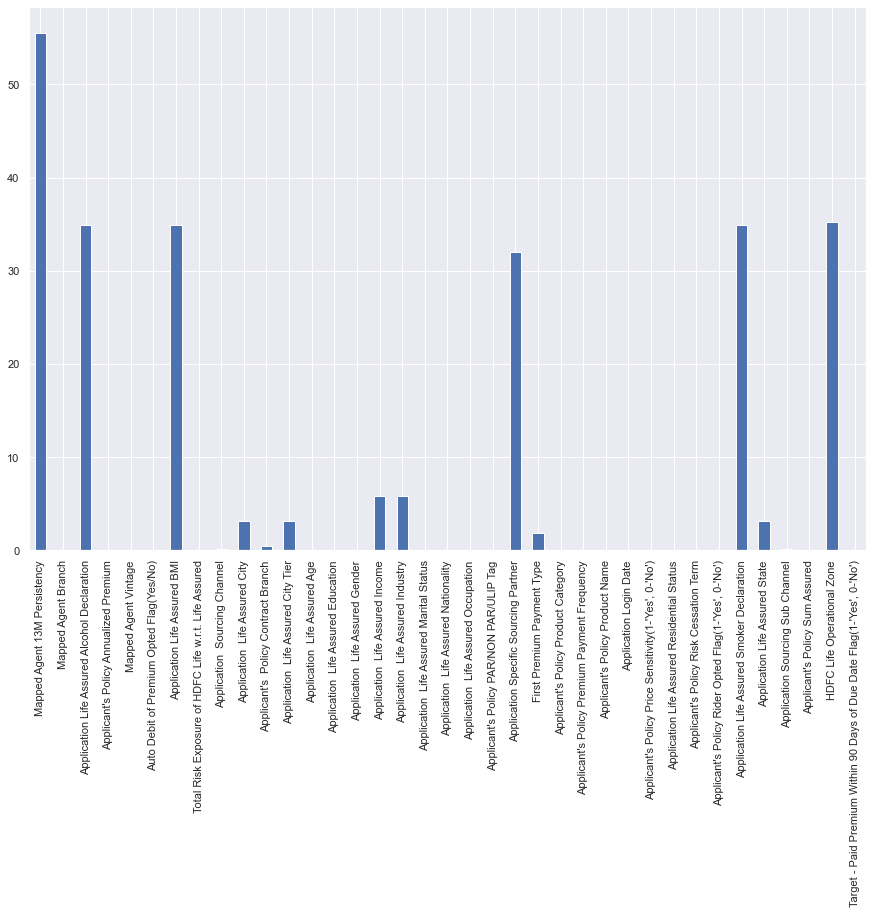

In [18]:
# Display the percentage of the columns having missing values
(df_train.isna().sum()/df_train.shape[0] * 100).plot(kind = 'bar',figsize=(15,10))

In [19]:
# Check the sum of missing values are present in training dataset
df_train.isnull().sum()

Mapped Agent 13M Persistency                                              55552
Mapped Agent Branch                                                           2
Application Life Assured Alcohol Declaration                              34918
Applicant's Policy Annualized Premium                                         2
Mapped Agent Vintage                                                          2
Auto Debit of Premium Opted Flag(Yes/No)                                      0
Application Life Assured BMI                                              34930
Total Risk Exposure of HDFC Life w.r.t. Life Assured                         29
Application  Sourcing Channel                                               145
Application  Life Assured City                                             3127
Applicant's  Policy Contract Branch                                         443
Application  Life Assured City Tier                                        3127
Application  Life Assured Age           

In [20]:
# Check the percentage of missing values are present in training dataset which is more than 0.0
x = df_train.isna().sum()/df_train.shape[0] * 100
x[x > 0.0]

Mapped Agent 13M Persistency                            55.552
Mapped Agent Branch                                      0.002
Application Life Assured Alcohol Declaration            34.918
Applicant's Policy Annualized Premium                    0.002
Mapped Agent Vintage                                     0.002
Application Life Assured BMI                            34.930
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0.029
Application  Sourcing Channel                            0.145
Application  Life Assured City                           3.127
Applicant's  Policy Contract Branch                      0.443
Application  Life Assured City Tier                      3.127
Application  Life Assured Age                            0.002
Application  Life Assured Education                      0.002
Application  Life Assured Gender                         0.002
Application  Life Assured Income                         5.879
Application  Life Assured Industry                     

In [21]:
# Detail statistical information of the dataset
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Mapped Agent 13M Persistency,44448.0,4.084259e+01,4.190467e+01,0.00000,0.83070,8.28000,8.600000e+01,100.0
Applicant's Policy Annualized Premium,99998.0,5.923158e+04,1.373189e+05,920.00000,23907.00000,34500.00000,5.852425e+04,20000000.0
Mapped Agent Vintage,99998.0,2.990045e+01,2.991118e+01,0.00000,8.00000,22.00000,3.800000e+01,223.0
Application Life Assured BMI,65070.0,2.428658e+01,7.903450e+00,0.73462,22.31328,23.88844,2.571166e+01,800.0
Total Risk Exposure of HDFC Life w.r.t. Life Assured,99971.0,2.217563e+06,7.956175e+06,0.00000,230362.00000,500000.00000,1.200000e+06,700000000.0
Application Life Assured Age,99998.0,3.783676e+01,1.093509e+01,-1.00000,30.00000,37.00000,4.500000e+01,69.0
Application Life Assured Income,94121.0,9.342781e+05,5.032388e+06,0.00000,300000.00000,500000.00000,8.000000e+05,932343450.0
"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",100000.0,1.467000e-01,3.538084e-01,0.00000,0.00000,0.00000,0.000000e+00,1.0
Applicant's Policy Risk Cessation Term,100000.0,1.559115e+01,9.165138e+00,5.00000,10.00000,10.00000,1.600000e+01,72.0
"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",100000.0,4.520000e-01,4.976932e-01,0.00000,0.00000,0.00000,1.000000e+00,1.0


In [22]:
# Categorical Columns in df
df_train_cat = df_train[['Mapped Agent Branch', 'Application Life Assured Alcohol Declaration',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured Education',
        'Application  Life Assured City Tier',
       'Application  Life Assured Gender',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant\'s Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant\'s Policy Product Category',
       'Applicant\'s Policy Premium Payment Frequency',
       'Applicant\'s Policy Product Name', 'Application Login Date',
       'Application Life Assured Residential Status',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

In [23]:
df_train_1 = df_train.drop(df_train_cat.columns, axis =1 )

In [24]:
df_train_1.head()

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Life Assured Age,Application Life Assured Income,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Applicant's Policy Sum Assured,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')"
0,0.8773,622010.0,77.0,NaN,0.0,46.0,7200000.0,0,14.0,1,7901018.0,1
1,93.4700,7157.0,33.0,16.22784,10000000.0,24.0,495000.0,1,40.0,1,10000000.0,1
2,86.6100,27426.0,99.0,20.83070,18000000.0,33.0,2500000.0,1,30.0,1,30000000.0,1
3,NaN,33493.0,3.0,NaN,350000.0,28.0,450000.0,0,12.0,0,212857.0,1
4,0.8307,12335.0,32.0,NaN,58326.0,37.0,250000.0,0,10.0,1,116653.0,1


In [25]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column                                                                  Non-Null Count   Dtype  
---  ------                                                                  --------------   -----  
 0   Mapped Agent 13M Persistency                                            44448 non-null   float64
 1   Applicant's Policy Annualized Premium                                   99998 non-null   float64
 2   Mapped Agent Vintage                                                    99998 non-null   float64
 3   Application Life Assured BMI                                            65070 non-null   float64
 4   Total Risk Exposure of HDFC Life w.r.t. Life Assured                    99971 non-null   float64
 5   Application  Life Assured Age                                           99998 non-null   float64
 6   Application  Life Assured Income                                     

In [26]:
df_train_1.isna().sum()

Mapped Agent 13M Persistency                                              55552
Applicant's Policy Annualized Premium                                         2
Mapped Agent Vintage                                                          2
Application Life Assured BMI                                              34930
Total Risk Exposure of HDFC Life w.r.t. Life Assured                         29
Application  Life Assured Age                                                 2
Application  Life Assured Income                                           5879
Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')                         0
Applicant's Policy Risk Cessation Term                                        0
Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')                          0
Applicant's Policy Sum Assured                                                0
Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')        0
dtype: int64

In [27]:
# Columns which are having any missing values
df_train_1_miss = df_train_1[['Mapped Agent 13M Persistency', 'Applicant\'s Policy Annualized Premium',
       'Mapped Agent Vintage', 'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Life Assured Age', 'Application  Life Assured Income']]

## Missing values can be imputed in different ways

### Mean / Median imputation
* Mean / Median imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a complete dataset that can be used to train machine learning models.
* Mean / median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).
* The mean and median can only be calculated on numerical variables, therefore these methods are suitable for continuous and discrete numerical variables only.
* When replacing NA with the mean or median, the variance of the variable will be distorted if the number of NA is big respect to the total number of observations, leading to underestimation of the variance.
* In addition, estimates of covariance and correlations with other variables in the dataset may also be affected. Mean / median imputation may alter intrinsic correlations since the mean / median value that now replaces the missing data will not necessarily preserve the relation with the remaining variables.
* Finally, concentrating all missing values at the mean / median value, may lead to observations that are common occurrences in the distribution, to be picked up as outliers.

### Arbitrary value imputation

* Arbitrary value imputation consists of replacing all occurrences of missing values (NA) within a variable by an arbitrary value. Typically used arbitrary values are 0, 999, -999 (or other combinations of 9s) or -1 (if the distribution is positive).

### End of distribution imputation

* In the previous point we saw missing data by an arbitrary value. However, determining the value of the arbitrary value can be laborious and it is usually a manual job. We can automate this process by automatically selecting arbitrary values at the end of the variable distributions.

 * How do we select the value at the end?
 * If the variable is normally distributed, we can use the mean plus or minus 3 times the standard deviation
 * If the variable is skewed, we can use the IQR proximity rule
 
### Frequent category imputation | Mode imputation

* Mode imputation consists of replacing all occurrences of missing values (NA) within a variable by the mode, which in other words refers to the most frequent value or most frequent category.
* Although the mode, or most frequent value can be calculated for both numerical and categorical variables, in practice, we only use this technique on categorical variables. The reason is that for numerical variables, the mean or the median tend to better represent the average value of the population.

### Arbitrary value imputation for categorical variables

* This is the most widely used method of missing data imputation for categorical variables. This method consists in treating missing data as an additional label or category of the variable. All the missing observations are grouped in the newly created label 'Missing'.
* This is in essence, the equivalent of replacing by an arbitrary value for numerical variables.
* The beauty of this technique resides on the fact that it does not assume anything about the fact that the data is missing. It is very well suited when the number of missing data is high.

### Random sample imputation

* Random sampling imputation is in principle similar to mean / median / mode imputation, in the sense that it aims to preserve the statistical parameters of the original variable, for which data is missing.
* Random sampling consist of taking a random observation from the pool of available observations of the variable, and using that randomly extracted value to fill the NA. In random sample imputation one takes as many random observations as missing values are present in the variable.
* By random sampling observations of the variable for those instances where data is available, we guarantee that the mean and standard deviation of the variable are preserved.
* By random sampling observations of the present categories, for categorical variables, we guarantee that the frequency of the different categories / labels within the variable is preserved.

### Adding a variable to capture NA

* In previous point we learnt how to replace missing values by the mean, median or by extracting a random value. In other words we learnt about mean / median and random sample imputation. These methods assume that the data are missing completely at random (MCAR).
* There are other methods that can be used when values are not missing at random, for example arbitrary value imputation or end of distribution imputation. However, these imputation techniques will affect the variable distribution dramatically, and are therefore not suitable for linear models.
* Adding a missing indicator will increase 1 variable per variable in the dataset with missing values. So if the dataset contains 10 features, and all of them have missing values, after adding a missing indicator we will have a dataset with 20 features: the original 10 features plus additional 10 binary features, which indicate for each of the original variables whether the value was missing or not. This may not be a problem in datasets with tens to a few hundreds variables, but if our original dataset contains thousands of variables, by creating an additional variable to indicate NA, we will end up with very big datasets.

### 3.2 Numerical missing values imputation

In [28]:
df_train_1_miss.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Life Assured Age', 'Application  Life Assured Income'],
      dtype='object')

In [29]:
df_train['Mapped Agent 13M Persistency'][df_train['Mapped Agent 13M Persistency'] == 0.0].shape

(533,)

So, in here 533 values are having 0 values

In [30]:
df_train['Mapped Agent 13M Persistency'] = df_train['Mapped Agent 13M Persistency'].apply(lambda x: x * 100 if (x < 1.0) else x )

In [31]:
(df_train['Mapped Agent 13M Persistency'] < 1).sum()

533

This value is equal to 0

In [32]:
df_train_1_miss.columns.shape

(7,)

Missing values are there in 28 columns

In [33]:
df_train_1_miss.isna().sum()/df_train.shape[0] * 100

Mapped Agent 13M Persistency                            55.552
Applicant's Policy Annualized Premium                    0.002
Mapped Agent Vintage                                     0.002
Application Life Assured BMI                            34.930
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0.029
Application  Life Assured Age                            0.002
Application  Life Assured Income                         5.879
dtype: float64

In [34]:
df_train_1_miss.describe().T

,count,mean,std,min,25%,50%,75%,max
Mapped Agent 13M Persistency,44448.0,4.084259e+01,4.190467e+01,0.00000,0.83070,8.28000,8.600000e+01,100.0
Applicant's Policy Annualized Premium,99998.0,5.923158e+04,1.373189e+05,920.00000,23907.00000,34500.00000,5.852425e+04,20000000.0
Mapped Agent Vintage,99998.0,2.990045e+01,2.991118e+01,0.00000,8.00000,22.00000,3.800000e+01,223.0
Application Life Assured BMI,65070.0,2.428658e+01,7.903450e+00,0.73462,22.31328,23.88844,2.571166e+01,800.0
Total Risk Exposure of HDFC Life w.r.t. Life Assured,99971.0,2.217563e+06,7.956175e+06,0.00000,230362.00000,500000.00000,1.200000e+06,700000000.0
Application Life Assured Age,99998.0,3.783676e+01,1.093509e+01,-1.00000,30.00000,37.00000,4.500000e+01,69.0
Application Life Assured Income,94121.0,9.342781e+05,5.032388e+06,0.00000,300000.00000,500000.00000,8.000000e+05,932343450.0


In [35]:
Ratio_std_To_Mean = df_train_1_miss.std()/df_train_1_miss.mean()

In [36]:
Ratio_std_To_Mean

Mapped Agent 13M Persistency                            1.026004
Applicant's Policy Annualized Premium                   2.318340
Mapped Agent Vintage                                    1.000359
Application Life Assured BMI                            0.325425
Total Risk Exposure of HDFC Life w.r.t. Life Assured    3.587802
Application  Life Assured Age                           0.289007
Application  Life Assured Income                        5.386392
dtype: float64

We can observe that characteristics like 'Applicant's Policy Annualized Premium,' 'Mapped Agent Vintage,' 'Total Risk Exposure of HDFC Life w.r.t. Life Assured,' and 'Application Life Assured Income' have substantial standard deviations from mean, thus we can't infer mean values for them.

In [37]:
Ratio_std_To_Median = df_train_1_miss.std()/df_train_1_miss.median()

In [38]:
Ratio_std_To_Median

Mapped Agent 13M Persistency                             5.060950
Applicant's Policy Annualized Premium                    3.980259
Mapped Agent Vintage                                     1.359599
Application Life Assured BMI                             0.330848
Total Risk Exposure of HDFC Life w.r.t. Life Assured    15.912351
Application  Life Assured Age                            0.295543
Application  Life Assured Income                        10.064776
dtype: float64

We can observe that properties like 'Applicant's Policy Annualized Premium,' 'Mapped Agent Vintage,' 'Total Risk Exposure of HDFC Life w.r.t. Life Assured,' and 'Application Life Assured Income' have substantial standard deviations compared to the median, therefore we can't infer median values for them.

<AxesSubplot:>

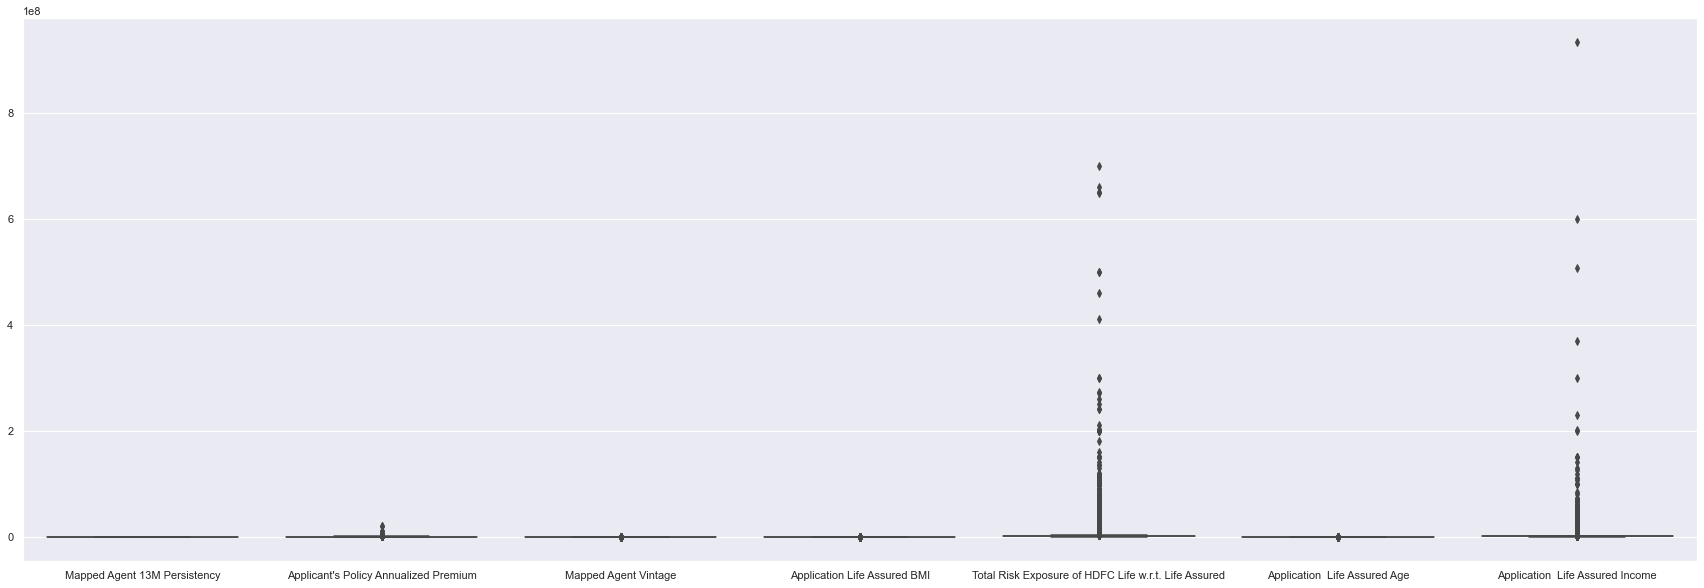

In [39]:
plt.figure(figsize=(30,10))
sns.boxplot(data= df_train_1_miss , palette='rainbow')

In here we can see some of the columns are having outliers also

In [40]:
df_train.shape

(100000, 37)

Now remove rows of 'Applicant's Policy Annualized Premium', 'Mapped Agent Vintage', 'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 'Application  Life Assured Age' as missing % is very less

In [41]:
# Checking which are the rows are having missing values
np.where(df_train[['Applicant\'s Policy Annualized Premium', 'Mapped Agent Vintage',
         'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 
         'Application  Life Assured Age']].isna())

(array([ 2964, 10231, 18814, 19043, 20184, 23614, 25967, 28163, 28400,
        28479, 31438, 32765, 43923, 48815, 54437, 66175, 69913, 70419,
        71168, 71168, 71168, 71168, 78994, 79558, 80757, 82162, 86639,
        88525, 88525, 88525, 88525, 90949, 93989, 94142, 96308],
       dtype=int64),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 3,
        2, 2, 2, 2, 2, 0, 1, 2, 3, 2, 2, 2, 2], dtype=int64))

In [42]:
df_train.drop([ 2964, 10231, 18814, 19043, 20184, 23614, 25967, 28163, 28400,
        28479, 31438, 32765, 43923, 48815, 54437, 66175, 69913, 70419,
        71168, 71168, 71168, 71168, 78994, 79558, 80757, 82162, 86639,
        88525, 88525, 88525, 88525, 90949, 93989, 94142, 96308],inplace =True, axis =0)

In [43]:
df_train.shape

(99971, 37)

In [44]:
df_train_1_miss.drop([ 2964, 10231, 18814, 19043, 20184, 23614, 25967, 28163, 28400,
        28479, 31438, 32765, 43923, 48815, 54437, 66175, 69913, 70419,
        71168, 71168, 71168, 71168, 78994, 79558, 80757, 82162, 86639,
        88525, 88525, 88525, 88525, 90949, 93989, 94142, 96308],inplace =True, axis =0)

In [45]:
df_train_1_miss.shape

(99971, 7)

In [46]:
df_train_1.drop([ 2964, 10231, 18814, 19043, 20184, 23614, 25967, 28163, 28400,
        28479, 31438, 32765, 43923, 48815, 54437, 66175, 69913, 70419,
        71168, 71168, 71168, 71168, 78994, 79558, 80757, 82162, 86639,
        88525, 88525, 88525, 88525, 90949, 93989, 94142, 96308],inplace =True, axis =0)

In [47]:
df_train_1.shape

(99971, 12)

In [48]:
df_train_1_miss.isna().sum()/df_train.shape[0] * 100

Mapped Agent 13M Persistency                            55.553110
Applicant's Policy Annualized Premium                    0.000000
Mapped Agent Vintage                                     0.000000
Application Life Assured BMI                            34.911124
Total Risk Exposure of HDFC Life w.r.t. Life Assured     0.000000
Application  Life Assured Age                            0.000000
Application  Life Assured Income                         5.852697
dtype: float64

In [49]:
df_train_1_miss.drop(['Applicant\'s Policy Annualized Premium', 'Mapped Agent Vintage',
         'Total Risk Exposure of HDFC Life w.r.t. Life Assured', 
         'Application  Life Assured Age'],inplace = True,axis = 1)

In [50]:
df_train_1_miss.isna().sum()/df_train.shape[0] * 100

Mapped Agent 13M Persistency        55.553110
Application Life Assured BMI        34.911124
Application  Life Assured Income     5.852697
dtype: float64

## 3.3 Categorical Missing Values Imputation

In [51]:
# Categorical Columns in df
df_train_cat = df_train[['Mapped Agent Branch', 'Application Life Assured Alcohol Declaration',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured Education',
        'Application  Life Assured City Tier',
       'Application  Life Assured Gender',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant\'s Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant\'s Policy Product Category',
       'Applicant\'s Policy Premium Payment Frequency',
       'Applicant\'s Policy Product Name', 'Application Login Date',
       'Application Life Assured Residential Status',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

In [52]:
df_train_cat.shape

(99971, 25)

In [53]:
df_train_cat.isna().sum()

Mapped Agent Branch                                 0
Application Life Assured Alcohol Declaration    34889
Auto Debit of Premium Opted Flag(Yes/No)            0
Application  Sourcing Channel                     143
Application  Life Assured City                   3124
Applicant's  Policy Contract Branch               441
Application  Life Assured Education                 0
Application  Life Assured City Tier              3124
Application  Life Assured Gender                    0
Application  Life Assured Industry               5845
Application  Life Assured Marital Status            0
Application  Life Assured Nationality               0
Application  Life Assured Occupation                0
Applicant's Policy PAR/NON PAR/ULIP Tag             0
Application Specific Sourcing Partner           32025
First Premium Payment Type                       1853
Applicant's Policy Product Category                 0
Applicant's Policy Premium Payment Frequency        0
Applicant's Policy Product N

In [54]:
df_train_cat_miss = df_train_cat[['Application Life Assured Alcohol Declaration',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

In [55]:
df_train_cat_miss.head()

,Application Life Assured Alcohol Declaration,Application Sourcing Channel,Application Life Assured City,Applicant's Policy Contract Branch,Application Life Assured City Tier,Application Life Assured Industry,Application Specific Sourcing Partner,First Premium Payment Type,Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,HDFC Life Operational Zone
0,NaN,HDFC BANK,Ghaziabad,Ghaziabad - Rajnagar,Tier II,Legal And Justice,HDFC BANK,DD,NaN,Uttar Pradesh,HDFC BANK,North 2
1,N,HDFC BANK,bangalore,Delhi - Nehru Place,Tier I,Trading,HDFC BANK,"ECS,SI",N,Karnataka,HDFC BANK,North 1
2,Y,EDM,mumbai,Mumbai - HUB,Tier I,Insurance,NaN,Online Credit/Debit Card/Teles Sales,N,Maharashtra,EDM,NaN
3,NaN,Other Banks & CA,thane,Mumbai - Borivali,Tier I,Consultant,RBL Bank Ltd,Online Credit/Debit Card/Teles Sales,NaN,Maharashtra,Ratnakar Bank,West
4,NaN,HDFC BANK,Pandharpur,Mumbai - HUB,Tier III,Sales And Marketing,HDFC BANK,Online Credit/Debit Card/Teles Sales,NaN,Maharashtra,HDFC BANK,NaN


In [56]:
df_train_cat_miss.isna().sum()

Application Life Assured Alcohol Declaration    34889
Application  Sourcing Channel                     143
Application  Life Assured City                   3124
Applicant's  Policy Contract Branch               441
Application  Life Assured City Tier              3124
Application  Life Assured Industry               5845
Application Specific Sourcing Partner           32025
First Premium Payment Type                       1853
Application Life Assured Smoker Declaration     34889
Application Life Assured State                   3122
Application Sourcing Sub Channel                  143
HDFC Life Operational Zone                      35259
dtype: int64

In [57]:
df_train.shape

(99971, 37)

In [58]:
# Dropping the rows which are having missings values in this selected columns
df_train = df_train.dropna(how = 'any',subset = ['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch', 'Application Sourcing Sub Channel'])

In [59]:
# Checking the sum od missing values in each columns
df_train.isna().sum()

Mapped Agent 13M Persistency                                              55163
Mapped Agent Branch                                                           0
Application Life Assured Alcohol Declaration                              34514
Applicant's Policy Annualized Premium                                         0
Mapped Agent Vintage                                                          0
Auto Debit of Premium Opted Flag(Yes/No)                                      0
Application Life Assured BMI                                              34526
Total Risk Exposure of HDFC Life w.r.t. Life Assured                          0
Application  Sourcing Channel                                                 0
Application  Life Assured City                                             3120
Applicant's  Policy Contract Branch                                           0
Application  Life Assured City Tier                                        3120
Application  Life Assured Age           

In [60]:
df_train_cat = df_train_cat.dropna(how = 'any',subset = ['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch', 'Application Sourcing Sub Channel'])

In [61]:
df_train_cat_miss = df_train_cat_miss.dropna(how = 'any',subset = ['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch', 'Application Sourcing Sub Channel'])

In [62]:
df_train_cat_miss.drop(['Application  Sourcing Channel', 'Applicant\'s  Policy Contract Branch', 'Application Sourcing Sub Channel'], axis =1, inplace = True)

In [63]:
df_train_cat_miss.isna().sum()

Application Life Assured Alcohol Declaration    34514
Application  Life Assured City                   3120
Application  Life Assured City Tier              3120
Application  Life Assured Industry               5835
Application Specific Sourcing Partner           31502
First Premium Payment Type                       1665
Application Life Assured Smoker Declaration     34514
Application Life Assured State                   3118
HDFC Life Operational Zone                      34742
dtype: int64

In [64]:
print('Number of Customers Application Life Assured Alcohol Declaration or Not.')
df_train_cat_miss['Application Life Assured Alcohol Declaration'].value_counts()

Number of Customers Application Life Assured Alcohol Declaration or Not.


N    62531
Y     2342
Name: Application Life Assured Alcohol Declaration, dtype: int64

<AxesSubplot:xlabel='Application Life Assured Alcohol Declaration', ylabel='count'>

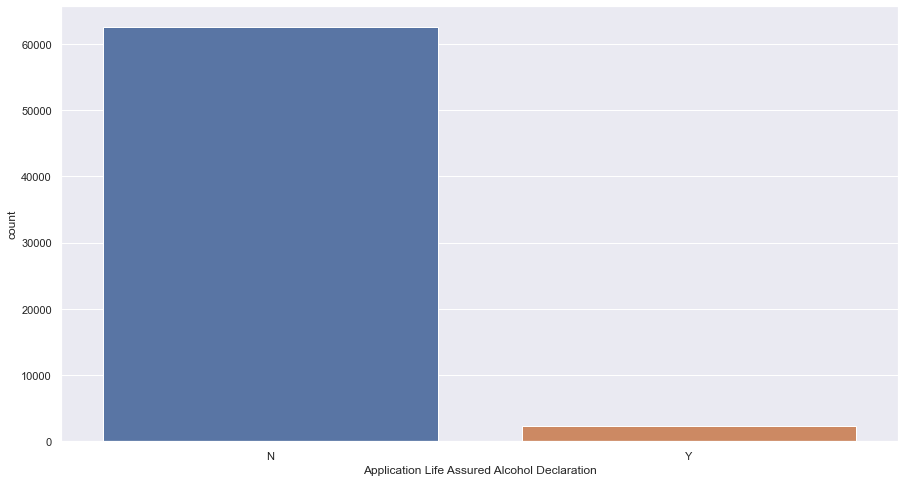

In [65]:
plt.figure(figsize=(15,8))
sns.countplot(df_train_cat_miss['Application Life Assured Alcohol Declaration'])

Application Life Assured Alcohol Declaration has been took less

In [66]:
print('Number of Customers Application Life Assured City.')
df_train_cat_miss['Application  Life Assured City'].value_counts().head(10)

Number of Customers Application Life Assured City.


mumbai       2371
pune         1683
bangalore    1629
Mumbai       1556
Bangalore    1393
chennai      1383
delhi        1179
hyderabad    1174
kolkata      1152
Delhi        1036
Name: Application  Life Assured City, dtype: int64

In [67]:
print('Number of Customers Application Life Assured City Tier.')
df_train_cat_miss['Application  Life Assured City Tier'].value_counts()

Number of Customers Application Life Assured City Tier.


Tier III    49570
Tier I      25306
Tier II     21391
Name: Application  Life Assured City Tier, dtype: int64

<AxesSubplot:xlabel='Application  Life Assured City Tier', ylabel='count'>

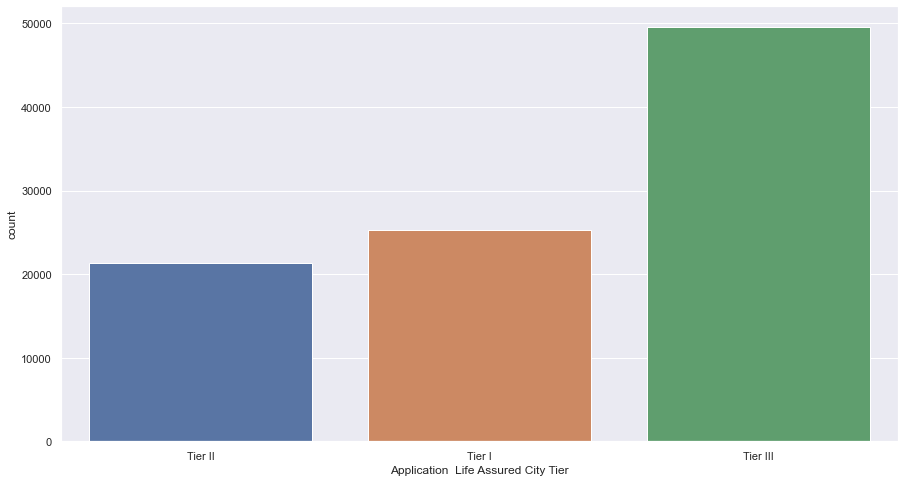

In [68]:
plt.figure(figsize=(15,8))
sns.countplot(df_train_cat_miss['Application  Life Assured City Tier'])

In Tier 3 city people took Application for Life Assured more

In [69]:
print('Number of Customers Application Life Assured Industry.')
df_train_cat_miss['Application  Life Assured Industry'].value_counts().head()

Number of Customers Application Life Assured Industry.


Business         7944
Agriculture      6036
Service          4843
Education        3418
Manufacturing    3071
Name: Application  Life Assured Industry, dtype: int64

In [70]:
print('Number of Customers Application Specific Sourcing Partner.')
df_train_cat_miss['Application Specific Sourcing Partner'].value_counts().head()

Number of Customers Application Specific Sourcing Partner.


HDFC BANK                     49722
HDFC Sales Private Limited     3501
RBL Bank Ltd                   1916
HDFC SECURITIES LIMITED        1279
DUMMY HDFC BANK UPSELL         1099
Name: Application Specific Sourcing Partner, dtype: int64

In [71]:
print('First Premium Payment Type.')
df_train_cat_miss['First Premium Payment Type'].value_counts()

First Premium Payment Type.


Cheque                                  22382
Online Credit/Debit Card/Teles Sales    21150
Online-Bill                             20408
DD                                      16699
Online Netbanking                        5987
Journal Entry                            5845
ECS,SI                                   4770
Credit Card Mandate                       420
Cash                                       61
Name: First Premium Payment Type, dtype: int64

<AxesSubplot:xlabel='First Premium Payment Type', ylabel='count'>

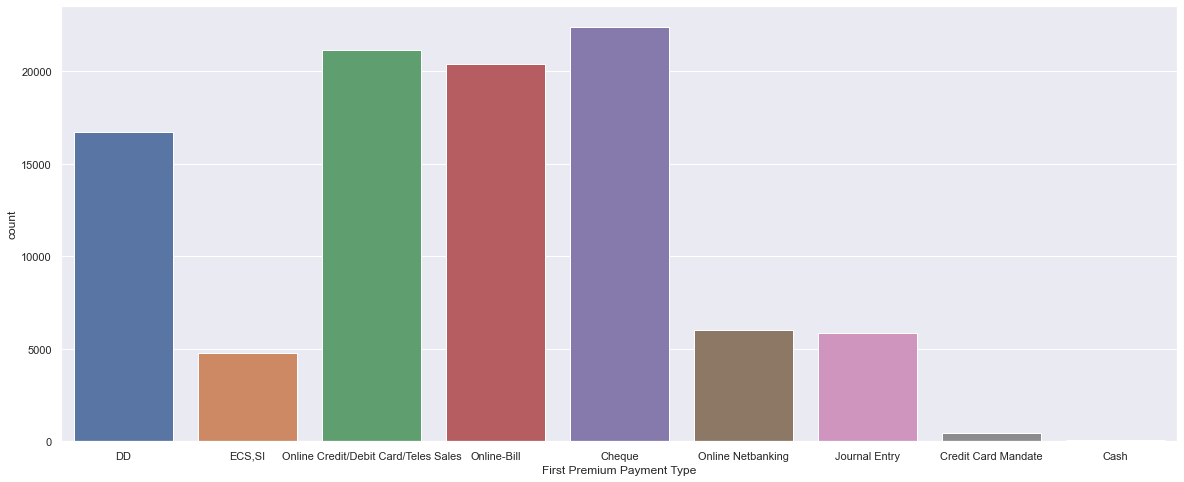

In [72]:
plt.figure(figsize=(20,8))
sns.countplot(df_train_cat_miss['First Premium Payment Type'])

Customers used cheque as a first premium payment type more

In [73]:
print('Number of Customers Application Life Assured Smoker Declaration.')
df_train_cat_miss['Application Life Assured Smoker Declaration'].value_counts()

Number of Customers Application Life Assured Smoker Declaration.


N    63653
Y     1220
Name: Application Life Assured Smoker Declaration, dtype: int64

<AxesSubplot:xlabel='Application Life Assured Smoker Declaration', ylabel='count'>

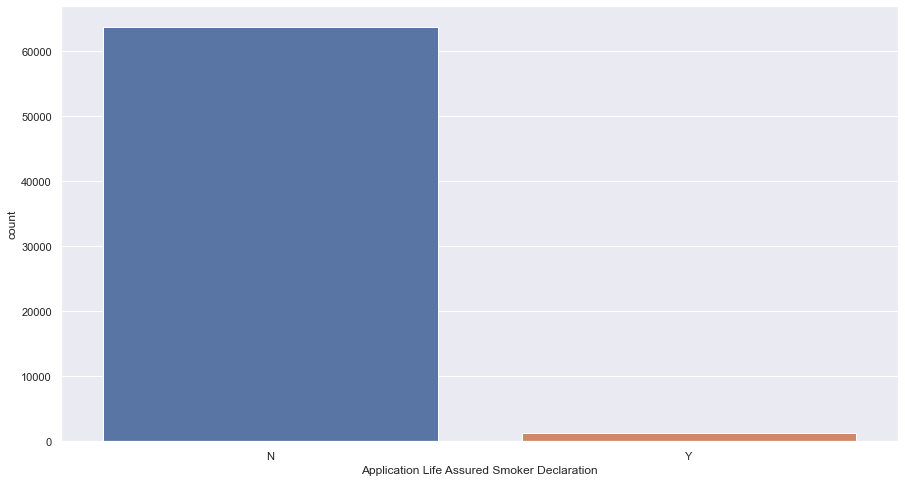

In [74]:
plt.figure(figsize=(15,8))
sns.countplot(df_train_cat_miss['Application Life Assured Smoker Declaration'])

Application Life Assured for Smoker Declaration verry less customers took

In [75]:
print('Number of Customers Application Life Assured State.')
df_train_cat_miss['Application Life Assured State'].value_counts()

Number of Customers Application Life Assured State.


Maharashtra                  15054
Uttar Pradesh                10022
Gujarat                       7223
Punjab                        6563
Tamil Nadu                    6212
Delhi                         5865
Haryana                       5375
West Bengal                   5071
Karnataka                     5035
Rajasthan                     3882
Madhya Pradesh                3659
Telangana                     3369
Andhra Pradesh                2779
Odisha                        2766
Kerala                        2389
Bihar                         2003
Assam                         1598
Jharkhand                     1350
Chattisgarh                   1150
Himachal Pradesh               984
Uttarakhand                    972
Jammu & Kashmir                747
Chandigarh                     426
Goa                            382
Manipur                        331
Meghalaya                      209
Tripura                        140
Pondicherry                    137
Dadra & Nagar Haveli

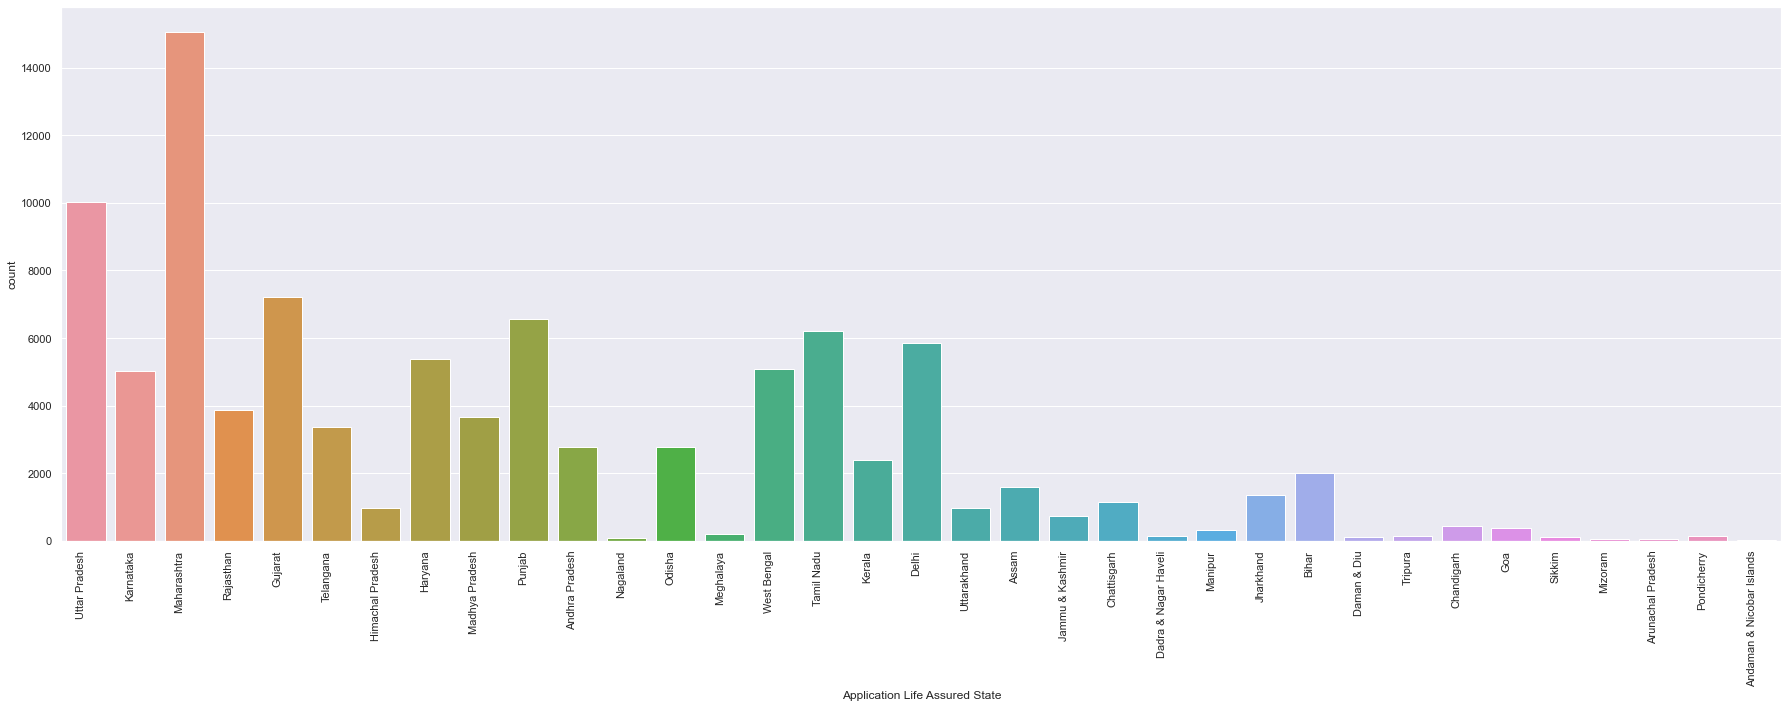

In [76]:
plt.figure(figsize=(25,10))
ax = sns.countplot(df_train_cat_miss['Application Life Assured State'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

Maharashtra is the state where Application Life Assured has been taken more

In [77]:
print('HDFC Life Operational Zone.')
df_train_cat_miss['HDFC Life Operational Zone'].value_counts()

HDFC Life Operational Zone.


North 1    15657
West       15295
East       12994
North 2     8060
South 1     7667
South 2     4972
Name: HDFC Life Operational Zone, dtype: int64

<AxesSubplot:xlabel='HDFC Life Operational Zone', ylabel='count'>

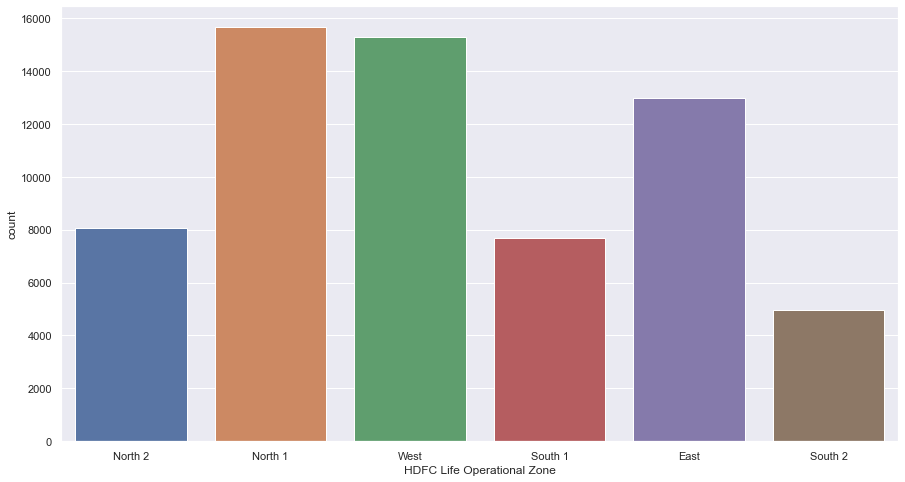

In [78]:
plt.figure(figsize=(15,8))
sns.countplot(df_train_cat_miss['HDFC Life Operational Zone'])

HDFC Life Operates more in Northern section of India

In [79]:
df_train_cat_miss.columns

Index(['Application Life Assured Alcohol Declaration',
       'Application  Life Assured City', 'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'HDFC Life Operational Zone'],
      dtype='object')

Now dropping all the rows having missing values

In [80]:
df_train = df_train.dropna(how = 'any',subset = ['Application Life Assured Alcohol Declaration',
       'Application  Life Assured City', 'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'HDFC Life Operational Zone'])

In [81]:
df_train.shape

(25327, 37)

In [82]:
df_train_cat = df_train_cat.dropna(how = 'any',subset = ['Application Life Assured Alcohol Declaration',
       'Application  Life Assured City', 'Application  Life Assured City Tier',
       'Application  Life Assured Industry',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'HDFC Life Operational Zone'])

In [83]:
df_train_cat.shape

(25327, 25)

In [84]:
df_train.isna().sum()

Mapped Agent 13M Persistency                                              14138
Mapped Agent Branch                                                           0
Application Life Assured Alcohol Declaration                                  0
Applicant's Policy Annualized Premium                                         0
Mapped Agent Vintage                                                          0
Auto Debit of Premium Opted Flag(Yes/No)                                      0
Application Life Assured BMI                                                  2
Total Risk Exposure of HDFC Life w.r.t. Life Assured                          0
Application  Sourcing Channel                                                 0
Application  Life Assured City                                                0
Applicant's  Policy Contract Branch                                           0
Application  Life Assured City Tier                                           0
Application  Life Assured Age           

In [85]:
df_train = df_train.dropna(how = 'any',subset =['Application Life Assured BMI', 'Application  Life Assured Income'])

In [86]:
df_train.isna().sum()

Mapped Agent 13M Persistency                                              14133
Mapped Agent Branch                                                           0
Application Life Assured Alcohol Declaration                                  0
Applicant's Policy Annualized Premium                                         0
Mapped Agent Vintage                                                          0
Auto Debit of Premium Opted Flag(Yes/No)                                      0
Application Life Assured BMI                                                  0
Total Risk Exposure of HDFC Life w.r.t. Life Assured                          0
Application  Sourcing Channel                                                 0
Application  Life Assured City                                                0
Applicant's  Policy Contract Branch                                           0
Application  Life Assured City Tier                                           0
Application  Life Assured Age           

In [87]:
x = df_train['Mapped Agent 13M Persistency'].median()
x

80.17999999999999

Now replacing all the missing values of 'Mapped Agent 13M Persistency' with median

In [88]:
df_train['Mapped Agent 13M Persistency'][df_train['Mapped Agent 13M Persistency'].isna()] = x

In [89]:
df_train.isna().sum()

Mapped Agent 13M Persistency                                              0
Mapped Agent Branch                                                       0
Application Life Assured Alcohol Declaration                              0
Applicant's Policy Annualized Premium                                     0
Mapped Agent Vintage                                                      0
Auto Debit of Premium Opted Flag(Yes/No)                                  0
Application Life Assured BMI                                              0
Total Risk Exposure of HDFC Life w.r.t. Life Assured                      0
Application  Sourcing Channel                                             0
Application  Life Assured City                                            0
Applicant's  Policy Contract Branch                                       0
Application  Life Assured City Tier                                       0
Application  Life Assured Age                                             0
Application 

In [90]:
df_train.head()

,Mapped Agent 13M Persistency,Mapped Agent Branch,Application Life Assured Alcohol Declaration,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,...,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Application Life Assured Residential Status,Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')"
1,93.47,Delhi - Asaf Ali Road,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,bangalore,...,1,Resident Indian,40.0,1,N,Karnataka,HDFC BANK,10000000.0,North 1,1
16,81.59,Ahmedabad Vastrapur Branch,N,25000.0,42.0,N,28.34467,145501.0,HDFC BANK,Navsari,...,0,Resident Indian,16.0,0,N,Gujarat,HDFC BANK,145501.0,West,1
17,87.58,Jaipur-Tonk Road,N,35000.0,35.0,Y,21.87500,800000.0,Ex-HDFC,jaipur,...,0,Resident Indian,15.0,1,N,Rajasthan,HDFC Sales,1600000.0,North 2,1
28,80.18,Jaipur-Tonk Road,N,100000.0,12.0,Y,22.85714,1000000.0,HDFC BANK,Jaipur,...,0,Resident Indian,10.0,1,N,Rajasthan,HDFC BANK,2000000.0,North 2,1
33,97.19,Bhavnagar - Patni Plaza,N,15000.0,45.0,Y,20.70082,300000.0,HDFC BANK,botad,...,0,Resident Indian,20.0,1,N,Gujarat,HDFC BANK,165000.0,West,1


In [91]:
df_train = df_train.reset_index()

In [92]:
df_train.head()

,index,Mapped Agent 13M Persistency,Mapped Agent Branch,Application Life Assured Alcohol Declaration,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,...,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Application Life Assured Residential Status,Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')"
0,1,93.47,Delhi - Asaf Ali Road,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,...,1,Resident Indian,40.0,1,N,Karnataka,HDFC BANK,10000000.0,North 1,1
1,16,81.59,Ahmedabad Vastrapur Branch,N,25000.0,42.0,N,28.34467,145501.0,HDFC BANK,...,0,Resident Indian,16.0,0,N,Gujarat,HDFC BANK,145501.0,West,1
2,17,87.58,Jaipur-Tonk Road,N,35000.0,35.0,Y,21.87500,800000.0,Ex-HDFC,...,0,Resident Indian,15.0,1,N,Rajasthan,HDFC Sales,1600000.0,North 2,1
3,28,80.18,Jaipur-Tonk Road,N,100000.0,12.0,Y,22.85714,1000000.0,HDFC BANK,...,0,Resident Indian,10.0,1,N,Rajasthan,HDFC BANK,2000000.0,North 2,1
4,33,97.19,Bhavnagar - Patni Plaza,N,15000.0,45.0,Y,20.70082,300000.0,HDFC BANK,...,0,Resident Indian,20.0,1,N,Gujarat,HDFC BANK,165000.0,West,1


In [93]:
df_train = df_train.drop(['index'], axis = 1)
df_train.head()

,Mapped Agent 13M Persistency,Mapped Agent Branch,Application Life Assured Alcohol Declaration,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,...,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Application Life Assured Residential Status,Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')"
0,93.47,Delhi - Asaf Ali Road,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,bangalore,...,1,Resident Indian,40.0,1,N,Karnataka,HDFC BANK,10000000.0,North 1,1
1,81.59,Ahmedabad Vastrapur Branch,N,25000.0,42.0,N,28.34467,145501.0,HDFC BANK,Navsari,...,0,Resident Indian,16.0,0,N,Gujarat,HDFC BANK,145501.0,West,1
2,87.58,Jaipur-Tonk Road,N,35000.0,35.0,Y,21.87500,800000.0,Ex-HDFC,jaipur,...,0,Resident Indian,15.0,1,N,Rajasthan,HDFC Sales,1600000.0,North 2,1
3,80.18,Jaipur-Tonk Road,N,100000.0,12.0,Y,22.85714,1000000.0,HDFC BANK,Jaipur,...,0,Resident Indian,10.0,1,N,Rajasthan,HDFC BANK,2000000.0,North 2,1
4,97.19,Bhavnagar - Patni Plaza,N,15000.0,45.0,Y,20.70082,300000.0,HDFC BANK,botad,...,0,Resident Indian,20.0,1,N,Gujarat,HDFC BANK,165000.0,West,1


## 3.4 Outlier Analysis and Detection

An outlier is a data point which is significantly different from the remaining data. Outliers are common in statistics such as the mean and variance. Furthermore, certain Machine Learning models are susceptible to outliers, which might reduce their performance. As a result, depending on the method we want to train, we frequently eliminate outliers from our variables. 

Identifying possible outliers is critical for the following reasons: 
* An outlier may imply that the data is flawed. For example, the data may have been wrongly coded, or an experiment could have been done erroneously. 
* Outliers might be caused by random variance or by anything scientifically intriguing.
* It can be removed with the help of Inter Quartile Range by finding out the upper and lower limit between 0.75 to 0.25 if the outlier is present in the whole dataset at a certain distance of 1.5.

IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

lower_boundary = df[variable].quantile(0.25) - (IQR * distance)

upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

### Numerical columns Visualization

In [94]:
num_col = ['Mapped Agent 13M Persistency', 'Applicant\'s Policy Annualized Premium',
       'Mapped Agent Vintage', 'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Life Assured Age', 'Application  Life Assured Income',
       'Applicant\'s Policy Risk Cessation Term',
       'Applicant\'s Policy Sum Assured']

In [95]:
print('The length of numerical columns:', len(num_col))

The length of numerical columns: 9


<AxesSubplot:xlabel='Mapped Agent 13M Persistency', ylabel='Density'>

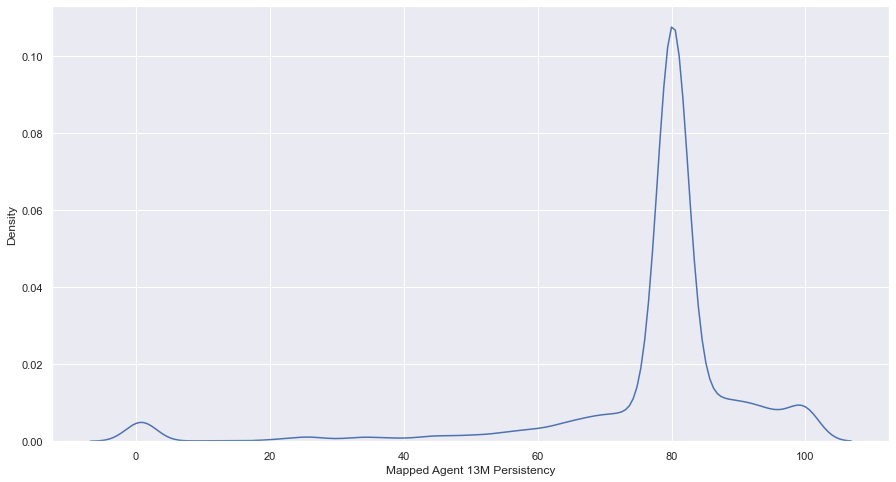

In [96]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train['Mapped Agent 13M Persistency'])

In [97]:
print('Minimum of Mapped Agent 13M Persistency:', df_train['Mapped Agent 13M Persistency'].min())

Minimum of Mapped Agent 13M Persistency: 0.0


In [98]:
print('Maximum of Mapped Agent 13M Persistency:', df_train['Mapped Agent 13M Persistency'].max())

Maximum of Mapped Agent 13M Persistency: 100.0


<AxesSubplot:xlabel="Applicant's Policy Annualized Premium", ylabel='Density'>

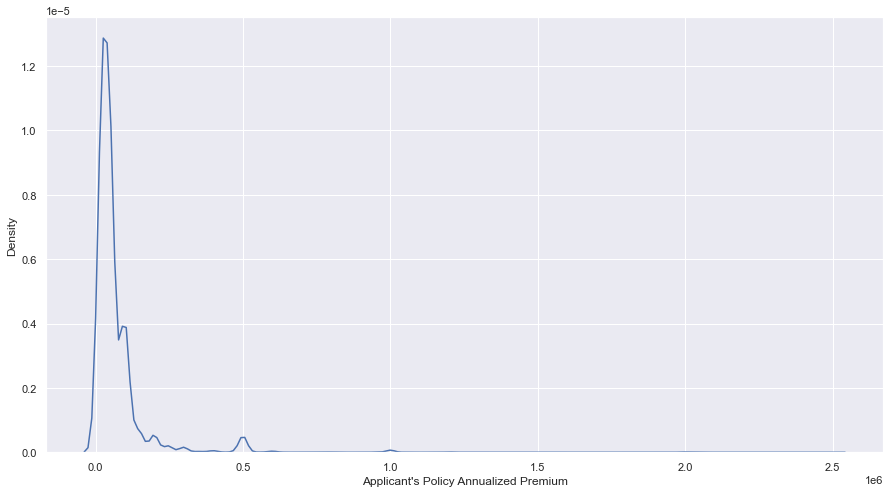

In [99]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train['Applicant\'s Policy Annualized Premium'])

In [100]:
print('Minimum of Applicant\'s Policy Annualized Premium:', df_train['Applicant\'s Policy Annualized Premium'].min())

Minimum of Applicant's Policy Annualized Premium: 3079.0


In [101]:
print('Maximum of Applicant\'s Policy Annualized Premium:', df_train['Applicant\'s Policy Annualized Premium'].max())

Maximum of Applicant's Policy Annualized Premium: 2500000.0


<AxesSubplot:xlabel='Mapped Agent Vintage', ylabel='Density'>

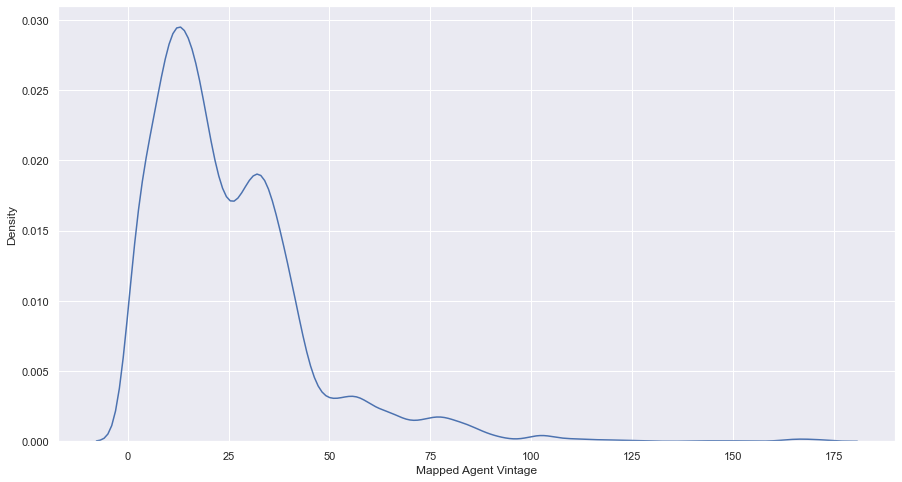

In [102]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train['Mapped Agent Vintage'])

In [103]:
print('Minimum of Mapped Agent Vintage:', df_train['Mapped Agent Vintage'].min())

Minimum of Mapped Agent Vintage: 0.0


In [104]:
print('Maximum of Mapped Agent Vintage:', df_train['Mapped Agent Vintage'].max())

Maximum of Mapped Agent Vintage: 173.0


<AxesSubplot:xlabel='Application Life Assured BMI', ylabel='Density'>

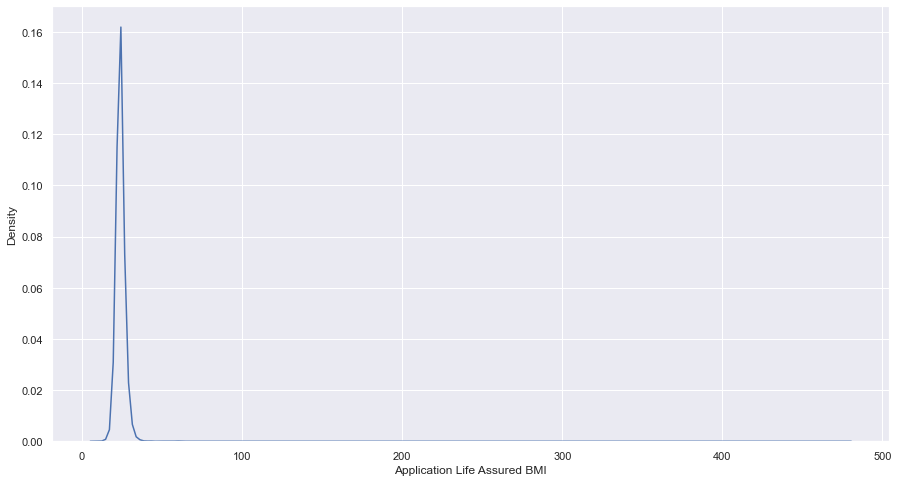

In [105]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train['Application Life Assured BMI'])

In [106]:
print('Minimum of Application Life Assured BMI:', df_train['Application Life Assured BMI'].min())

Minimum of Application Life Assured BMI: 7.324219999999999


In [107]:
print('Maximum of Application Life Assured BMI:', df_train['Application Life Assured BMI'].max())

Maximum of Application Life Assured BMI: 478.39506


<AxesSubplot:xlabel='Total Risk Exposure of HDFC Life w.r.t. Life Assured', ylabel='Density'>

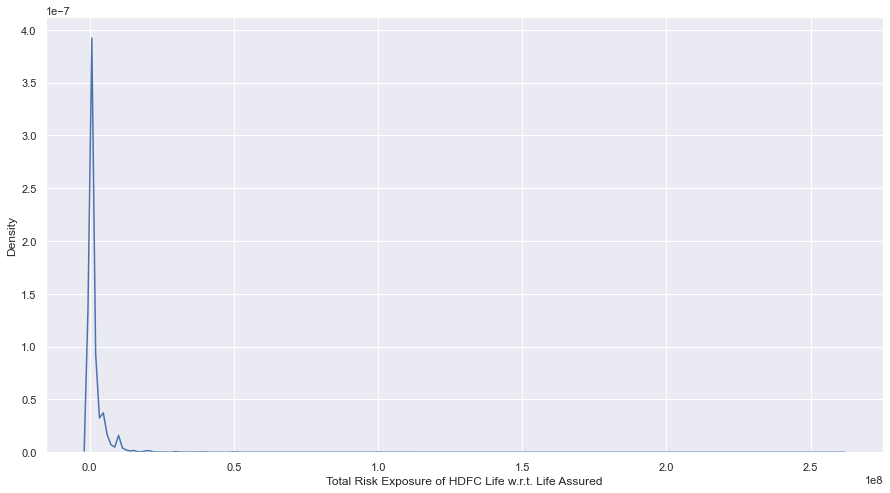

In [108]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train['Total Risk Exposure of HDFC Life w.r.t. Life Assured'])

In [109]:
print('Minimum of Total Risk Exposure of HDFC Life w.r.t. Life Assured:', df_train['Total Risk Exposure of HDFC Life w.r.t. Life Assured'].min())

Minimum of Total Risk Exposure of HDFC Life w.r.t. Life Assured: 51699.0


In [110]:
print('Maximum of Total Risk Exposure of HDFC Life w.r.t. Life Assured:', df_train['Total Risk Exposure of HDFC Life w.r.t. Life Assured'].max())

Maximum of Total Risk Exposure of HDFC Life w.r.t. Life Assured: 260000000.0


<AxesSubplot:xlabel='Application  Life Assured Age', ylabel='Density'>

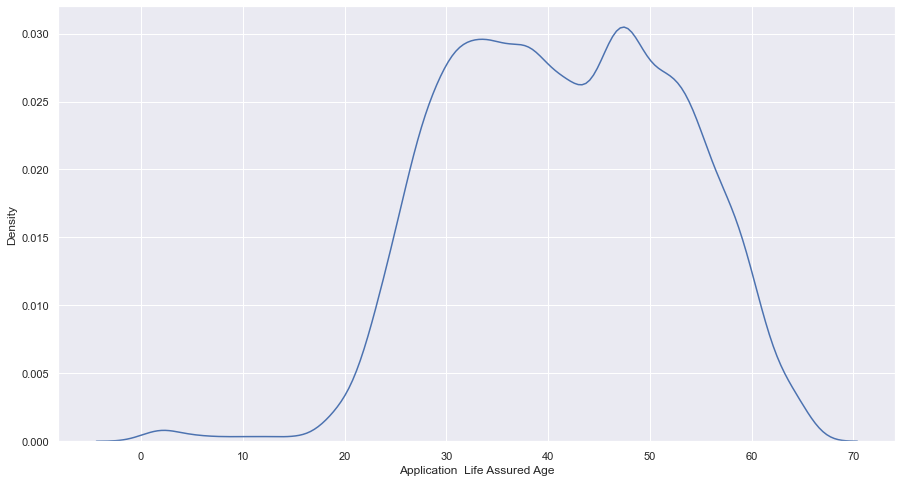

In [111]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train['Application  Life Assured Age'])

In [112]:
print('Minimum of Application  Life Assured Age:', df_train['Application  Life Assured Age'].min())

Minimum of Application  Life Assured Age: 0.0


In [113]:
print('Maximum of Application  Life Assured Age:', df_train['Application  Life Assured Age'].max())

Maximum of Application  Life Assured Age: 66.0


<AxesSubplot:xlabel='Application  Life Assured Income', ylabel='Density'>

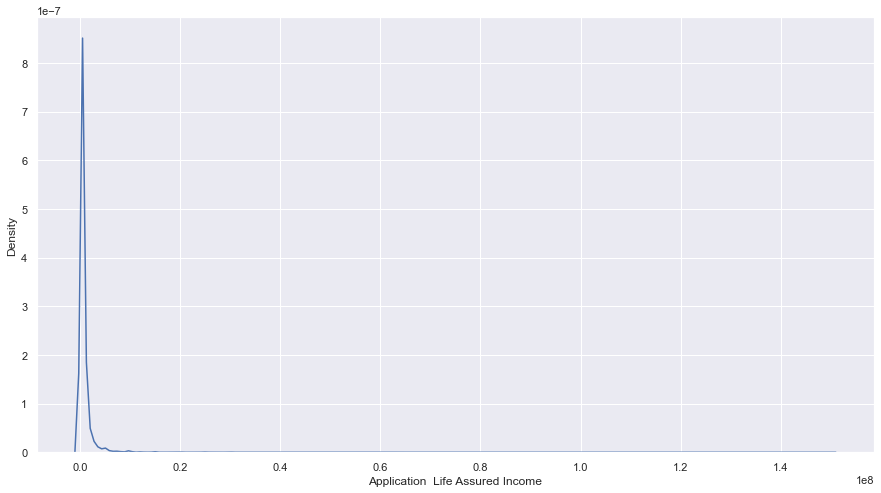

In [114]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train['Application  Life Assured Income'])

In [115]:
print('Minimum of Application  Life Assured Income:', df_train['Application  Life Assured Income'].min())

Minimum of Application  Life Assured Income: 1.0


In [116]:
print('Maximum of Application  Life Assured Income:', df_train['Application  Life Assured Income'].max())

Maximum of Application  Life Assured Income: 150000000.0


<AxesSubplot:xlabel="Applicant's Policy Risk Cessation Term", ylabel='Density'>

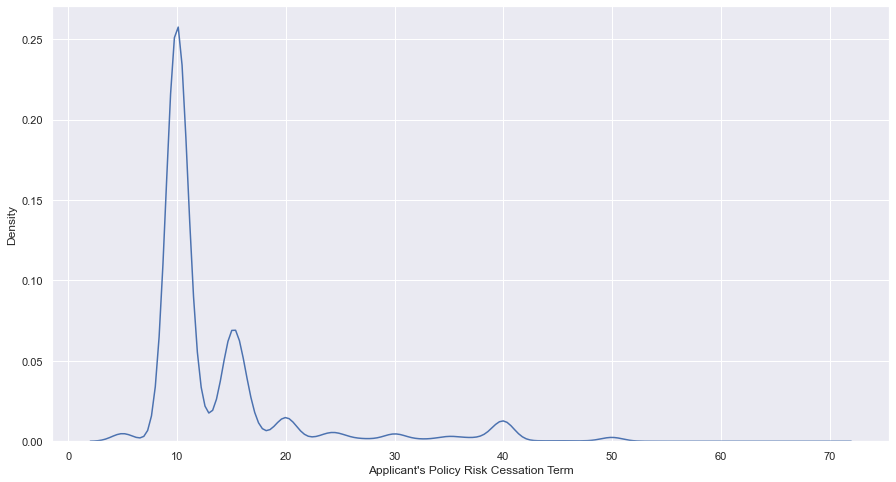

In [117]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train['Applicant\'s Policy Risk Cessation Term'])

In [118]:
print('Minimum of Applicant\'s Policy Risk Cessation Term:', df_train['Applicant\'s Policy Risk Cessation Term'].min())

Minimum of Applicant's Policy Risk Cessation Term: 5.0


In [119]:
print('Maximum of Applicant\'s Policy Risk Cessation Term:', df_train['Applicant\'s Policy Risk Cessation Term'].max())

Maximum of Applicant's Policy Risk Cessation Term: 69.0


<AxesSubplot:xlabel="Applicant's Policy Sum Assured", ylabel='Density'>

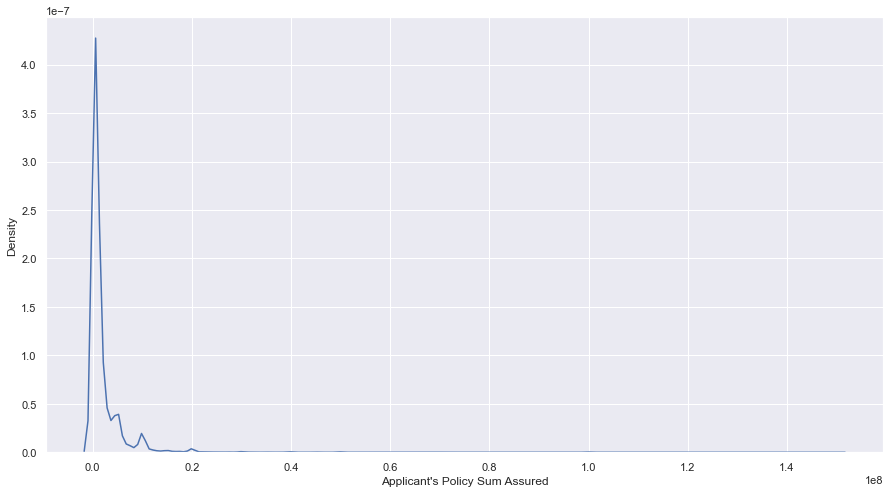

In [120]:
plt.figure(figsize=(15,8))
sns.kdeplot(df_train['Applicant\'s Policy Sum Assured'])

In [121]:
print('Minimum of Applicant\'s Policy Sum Assured:', df_train['Applicant\'s Policy Sum Assured'].min())

Minimum of Applicant's Policy Sum Assured: 29061.0


In [122]:
print('Maximum of Applicant\'s Policy Sum Assured:', df_train['Applicant\'s Policy Sum Assured'].max())

Maximum of Applicant's Policy Sum Assured: 150000000.0


In [123]:
print('Number of Applicant\'s Policy Price Sensitivity(1-\'Yes\', 0-\'No\'):')
df_train['Applicant\'s Policy Price Sensitivity(1-\'Yes\', 0-\'No\')'].value_counts()

Number of Applicant's Policy Price Sensitivity(1-'Yes', 0-'No'):


0    22664
1     2656
Name: Applicant's Policy Price Sensitivity(1-'Yes', 0-'No'), dtype: int64

<AxesSubplot:xlabel="Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')", ylabel='count'>

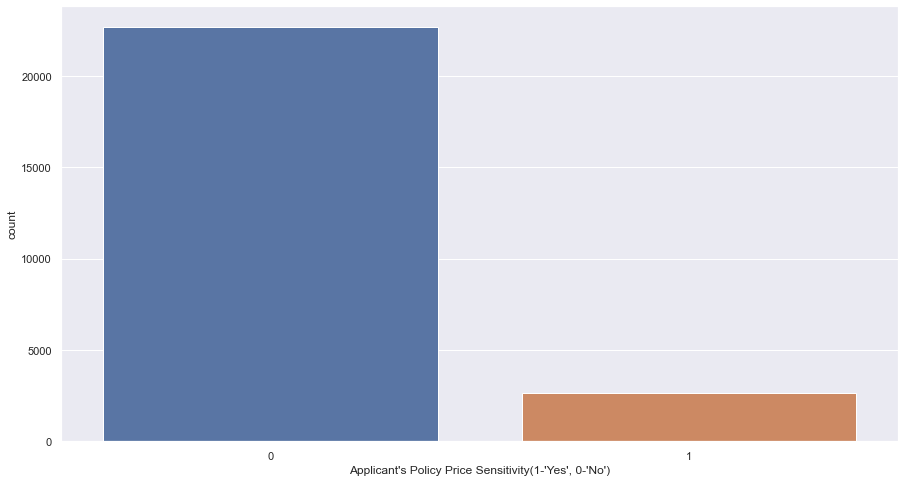

In [124]:
plt.figure(figsize=(15,8))
sns.countplot(df_train['Applicant\'s Policy Price Sensitivity(1-\'Yes\', 0-\'No\')'])

In [125]:
print('Number of Applicant\'s Policy Rider Opted Flag(1-\'Yes\', 0-\'No\'):')
df_train['Applicant\'s Policy Rider Opted Flag(1-\'Yes\', 0-\'No\')'].value_counts()

Number of Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No'):


1    13114
0    12206
Name: Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No'), dtype: int64

<AxesSubplot:xlabel="Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')", ylabel='count'>

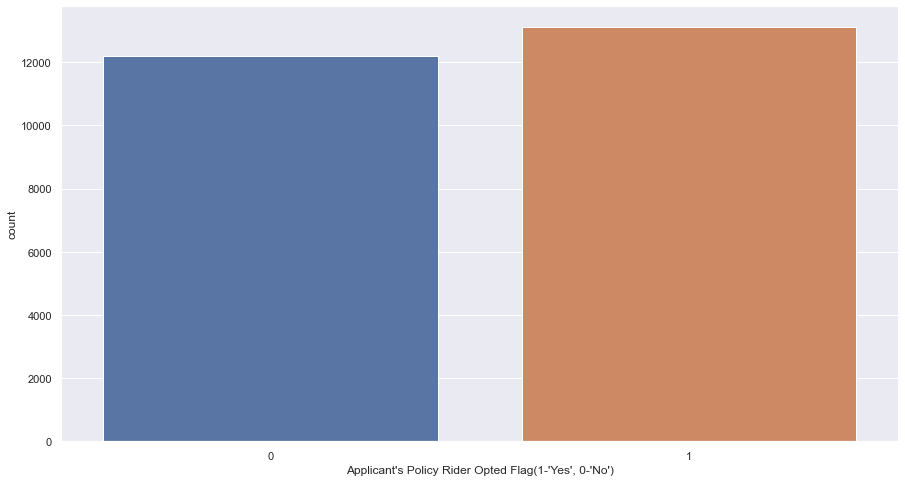

In [126]:
plt.figure(figsize=(15,8))
sns.countplot(df_train['Applicant\'s Policy Rider Opted Flag(1-\'Yes\', 0-\'No\')'])

In [127]:
print('Number of Target - Paid Premium Within 90 Days of Due Date Flag(1-\'Yes\', 0-\'No\'):')
df_train['Target - Paid Premium Within 90 Days of Due Date Flag(1-\'Yes\', 0-\'No\')'].value_counts()

Number of Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No'):


1    19713
0     5607
Name: Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No'), dtype: int64

<AxesSubplot:xlabel="Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')", ylabel='count'>

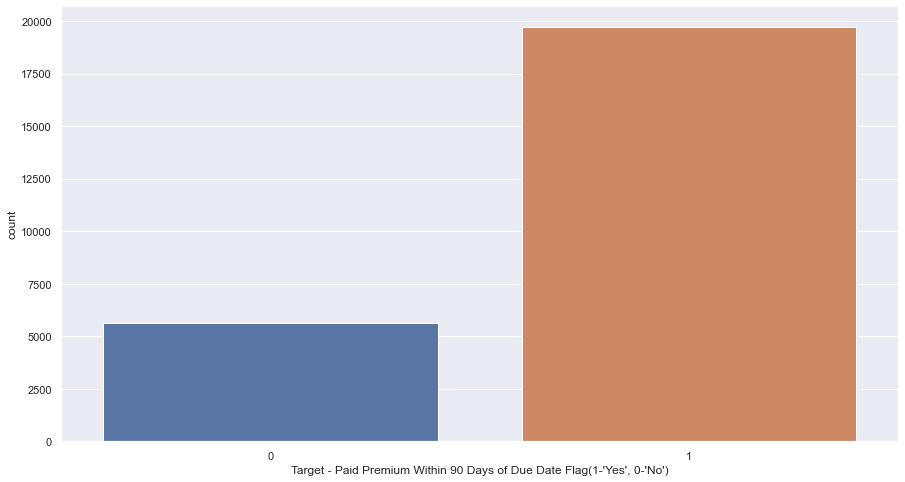

In [128]:
plt.figure(figsize=(15,8))
sns.countplot(df_train['Target - Paid Premium Within 90 Days of Due Date Flag(1-\'Yes\', 0-\'No\')'])

In here we can see that most of the customers paid premium within 90 days of due date

In [129]:
df_train.head()

,Mapped Agent 13M Persistency,Mapped Agent Branch,Application Life Assured Alcohol Declaration,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,...,"Applicant's Policy Price Sensitivity(1-'Yes', 0-'No')",Application Life Assured Residential Status,Applicant's Policy Risk Cessation Term,"Applicant's Policy Rider Opted Flag(1-'Yes', 0-'No')",Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')"
0,93.47,Delhi - Asaf Ali Road,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,bangalore,...,1,Resident Indian,40.0,1,N,Karnataka,HDFC BANK,10000000.0,North 1,1
1,81.59,Ahmedabad Vastrapur Branch,N,25000.0,42.0,N,28.34467,145501.0,HDFC BANK,Navsari,...,0,Resident Indian,16.0,0,N,Gujarat,HDFC BANK,145501.0,West,1
2,87.58,Jaipur-Tonk Road,N,35000.0,35.0,Y,21.87500,800000.0,Ex-HDFC,jaipur,...,0,Resident Indian,15.0,1,N,Rajasthan,HDFC Sales,1600000.0,North 2,1
3,80.18,Jaipur-Tonk Road,N,100000.0,12.0,Y,22.85714,1000000.0,HDFC BANK,Jaipur,...,0,Resident Indian,10.0,1,N,Rajasthan,HDFC BANK,2000000.0,North 2,1
4,97.19,Bhavnagar - Patni Plaza,N,15000.0,45.0,Y,20.70082,300000.0,HDFC BANK,botad,...,0,Resident Indian,20.0,1,N,Gujarat,HDFC BANK,165000.0,West,1


In [130]:
num_col = ['Mapped Agent 13M Persistency', 'Applicant\'s Policy Annualized Premium',
       'Mapped Agent Vintage', 'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Life Assured Age', 'Application  Life Assured Income',
       'Applicant\'s Policy Risk Cessation Term',
       'Applicant\'s Policy Sum Assured']

Percentile based outlier detection

* Percentiles are very useful for spotting outliers and conveying a typical experience in data that is expected to vary much. Data points that are distant from the 99th percentile and fewer than one percentile, for example, are termed outliers.

In [131]:
def percentile_based_outlier(data, threshold=95):
    diff = (100 - threshold) / 2.0
    (minval, maxval) = np.percentile(data, [diff, 100 - diff])
    return list(((data < minval) | (data > maxval)))

Inter quertile (IQR) range based outlier detection
* Though it is rarely impacted significantly by them, the interquartile range can be used to detect outliers. Calculate the interquartile range (IQR) by multiplying it by 1.5. (a constant used to discern outliers). To the third quartile, multiply 1.5 times (IQR). Any figure larger than this is considered an anomaly.

In [132]:
def outliers_iqr(data):
    quartile_1, quartile_3 = np.percentile(data, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return (data > upper_bound) | (data < lower_bound)

Mad based outlier detection
* The MAD statistic is more resistant to outliers in a data collection than the standard deviation. Because the standard deviation squares the distances from the mean, high deviations are weighted more strongly, and so outliers can have a substantial effect on it.

In [133]:
def mad_based_outlier(data, threshold=3.5):
    mean_y = np.mean(data)
    mean_absolute_deviation_y = np.mean([np.abs(y - mean_y) for y in data])
    modified_z_scores = [0.6745 * (y - mean_y) / mean_absolute_deviation_y for y in data]
    return np.abs(modified_z_scores) > threshold

Std deviation based outlier detection
* An outlier is a data point that deviates from the mean by a particular number of standard deviations. Because outliers raise the standard deviation, this approach may fail to detect them. The more severe the outlier, the greater the impact on the standard deviation.

In [134]:
def std_div(data, threshold=3):
    std = data.std()
    mean = data.mean()
    isOutlier = []
    for val in data:
        if abs((val-mean)/std) > threshold:
            isOutlier.append(True)
        else:
            isOutlier.append(False)
    return isOutlier

Combination of outlier detecting algorithms

In [135]:
def outlierVote(data):
    w = np.array(percentile_based_outlier(data))
    x = np.array(outliers_iqr(data))
    y = np.array(mad_based_outlier(data))
    z = np.array(std_div(data))
    # storing the outliers data of all the methods which is being used
    temp = zip([w,x, y, z])
    # Store in the dataframe
    dff = pd.DataFrame({'percentile_based':w,'iqr':x,'mad_based':y,'std_div':z})
    # Changing the dtyp of the outliers
    dff['percentile_based'] = dff['percentile_based'].apply(int)
    dff['iqr'] = dff['iqr'].apply(int)
    dff['mad_based'] = dff['mad_based'].apply(int)
    dff['std_div'] = dff['std_div'].apply(int)
    final = []
    final = dff.T.apply(lambda x:1 if (x.sum() >= 3) else 0 , axis = 0)
    return final.map({1:True, 0:False})

In [136]:
print('Length of Mapped Agent 13M Persistency:', len(np.array(df_train['Mapped Agent 13M Persistency'])))

Length of Mapped Agent 13M Persistency: 25320


In [137]:
np.array(df_train['Mapped Agent 13M Persistency'])

array([93.47, 81.59, 87.58, ..., 80.18, 80.18, 62.58])

In [138]:
def plotOutlier(x):
    fig, axes = plt.subplots(nrows=5)
    
    for ax, func in zip(axes, [percentile_based_outlier, outliers_iqr, mad_based_outlier, std_div, outlierVote]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)
    
    kwargs = dict(y=0.95, x=0.05, ha='left', va='top', size=20)  # text properties
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('Inter-quartile range Outliers', **kwargs)
    axes[2].set_title('MAD-based Outliers', **kwargs)
    axes[3].set_title('STD-based Outliers', **kwargs)
    axes[4].set_title('Majority vote based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=20)
    fig = plt.gcf()
    fig.set_size_inches(15,12)

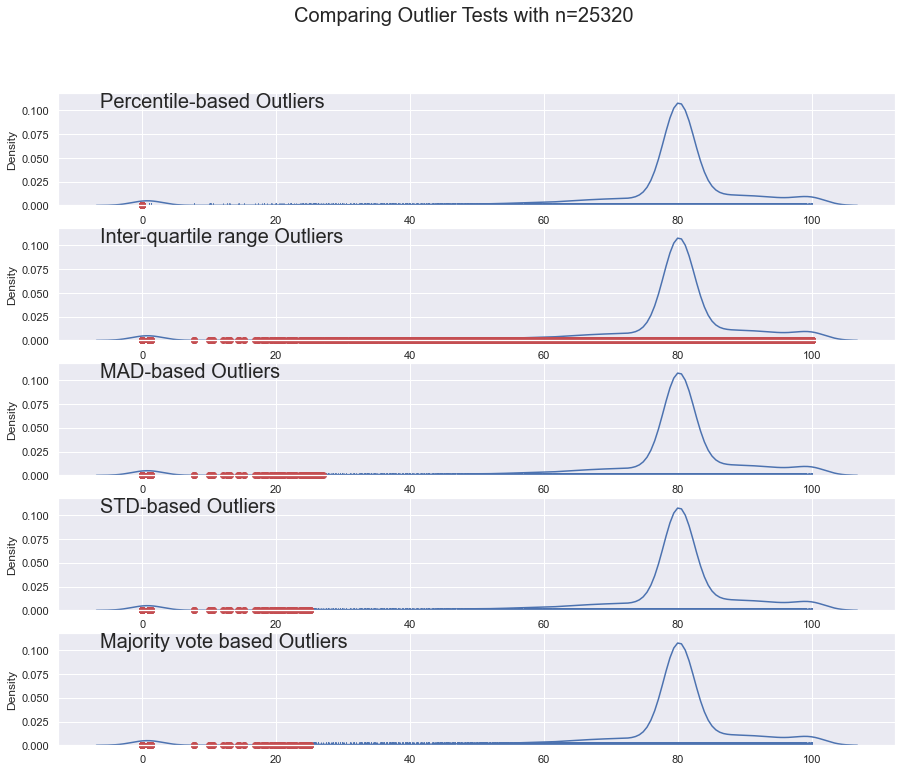

In [139]:
plotOutlier(np.array(df_train['Mapped Agent 13M Persistency']))

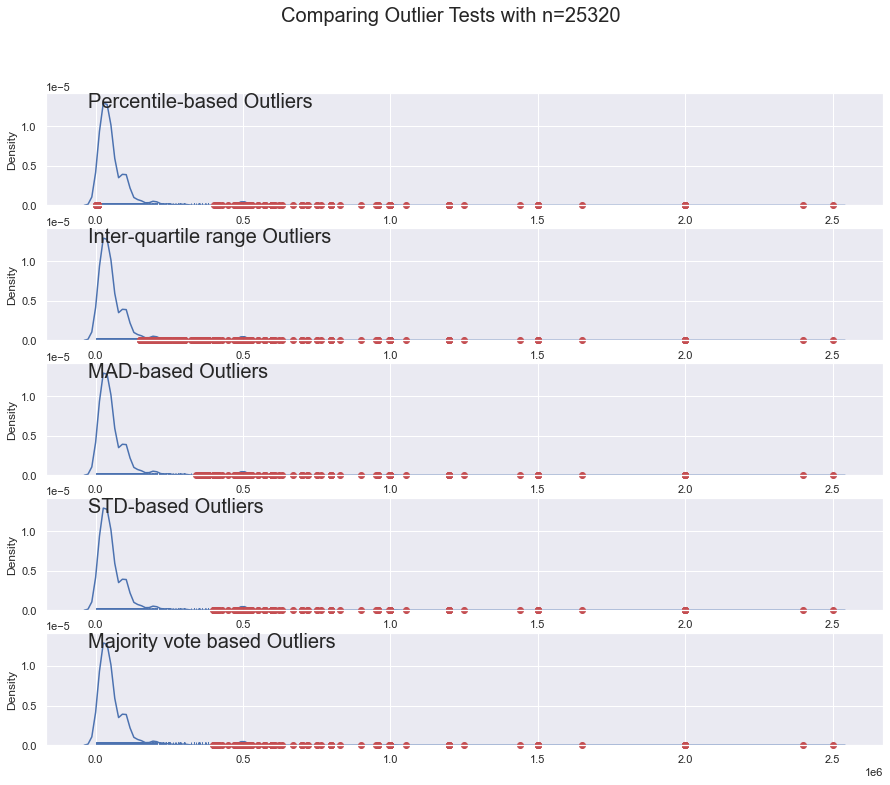

In [140]:
plotOutlier(np.array(df_train['Applicant\'s Policy Annualized Premium']))

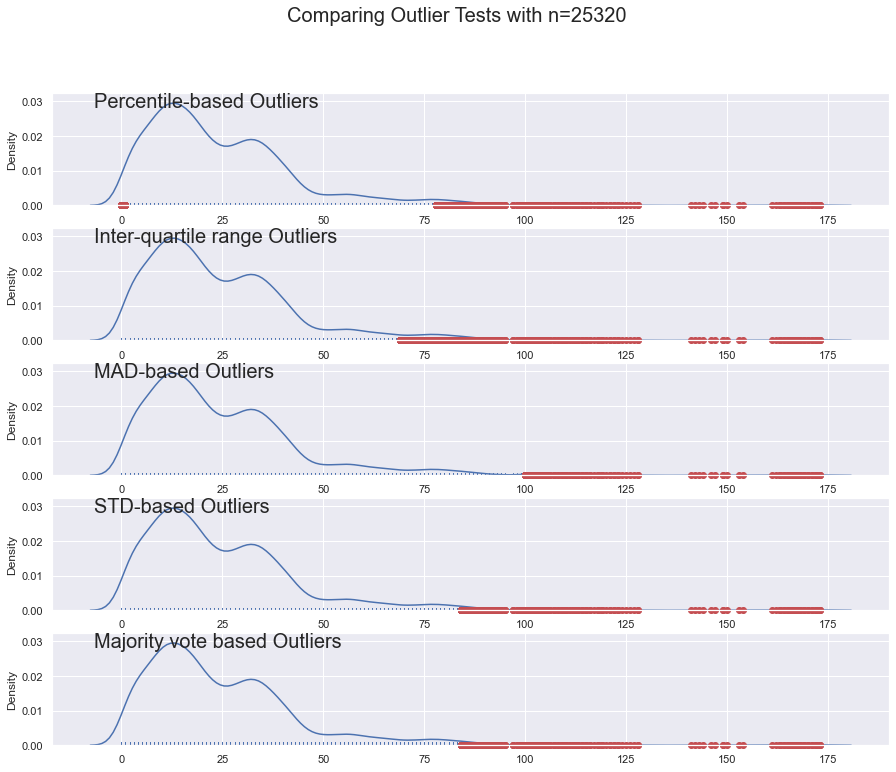

In [141]:
plotOutlier(np.array(df_train['Mapped Agent Vintage']))

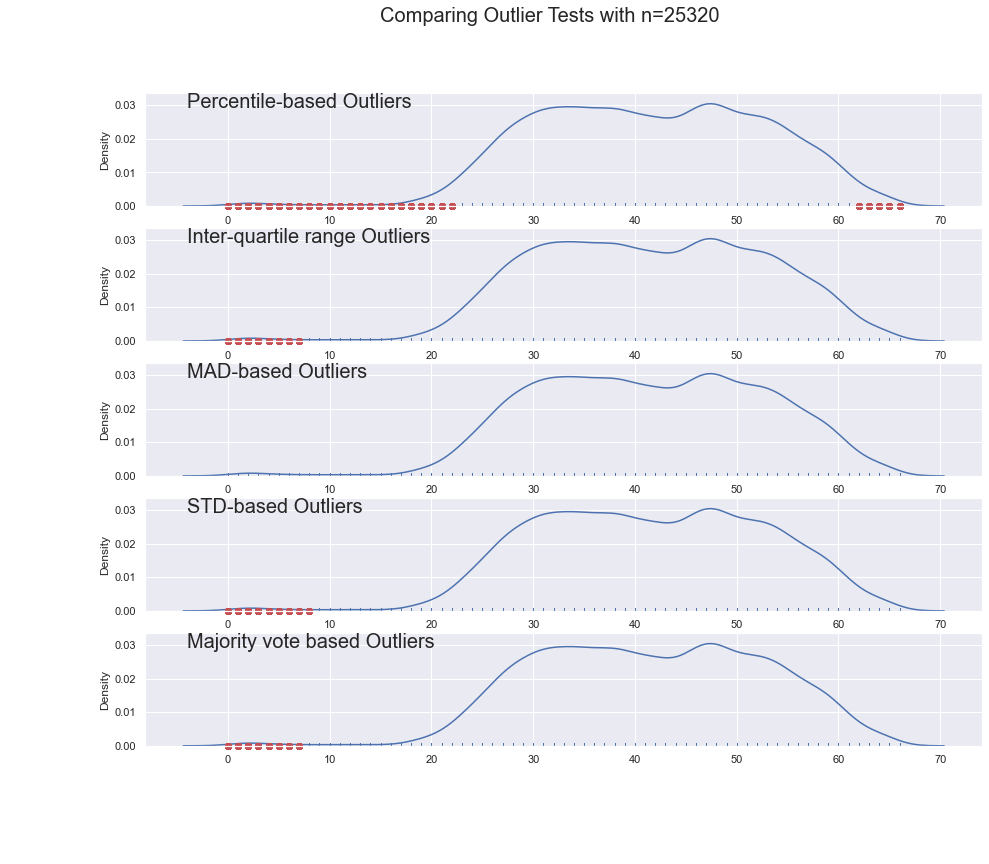

In [142]:
plotOutlier(np.array(df_train['Application  Life Assured Age']))

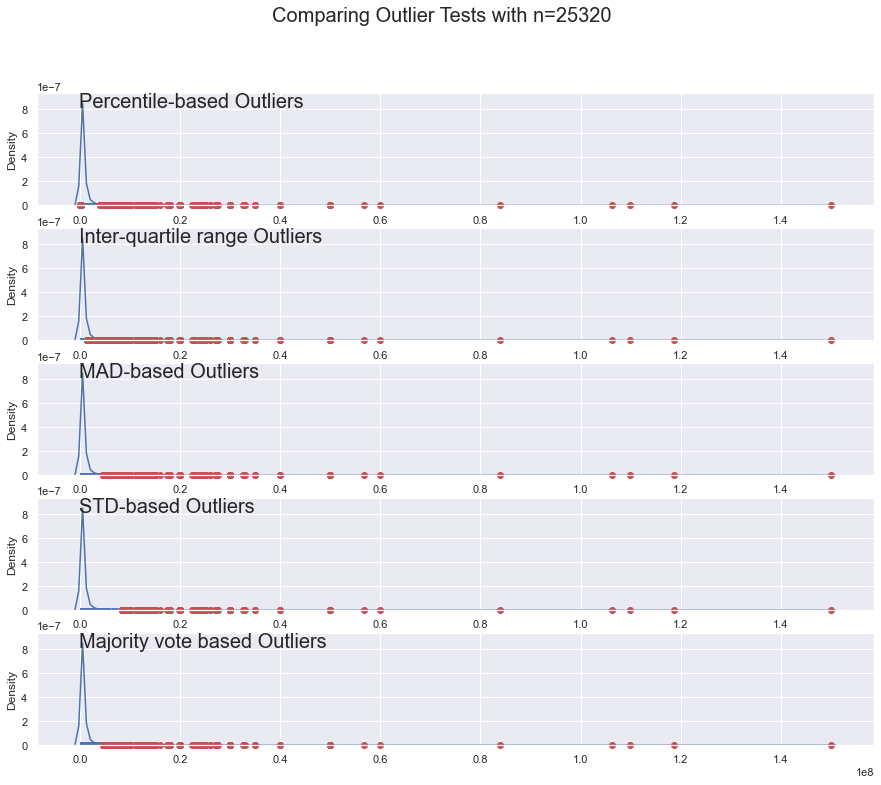

In [143]:
plotOutlier(np.array(df_train['Application  Life Assured Income']))

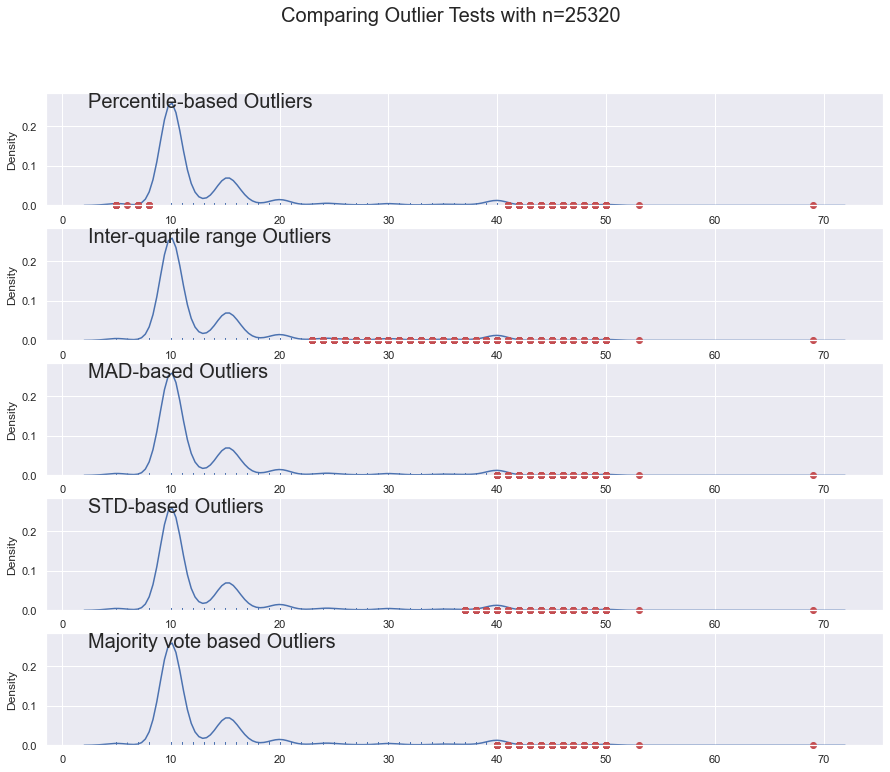

In [144]:
plotOutlier(np.array(df_train['Applicant\'s Policy Risk Cessation Term']))

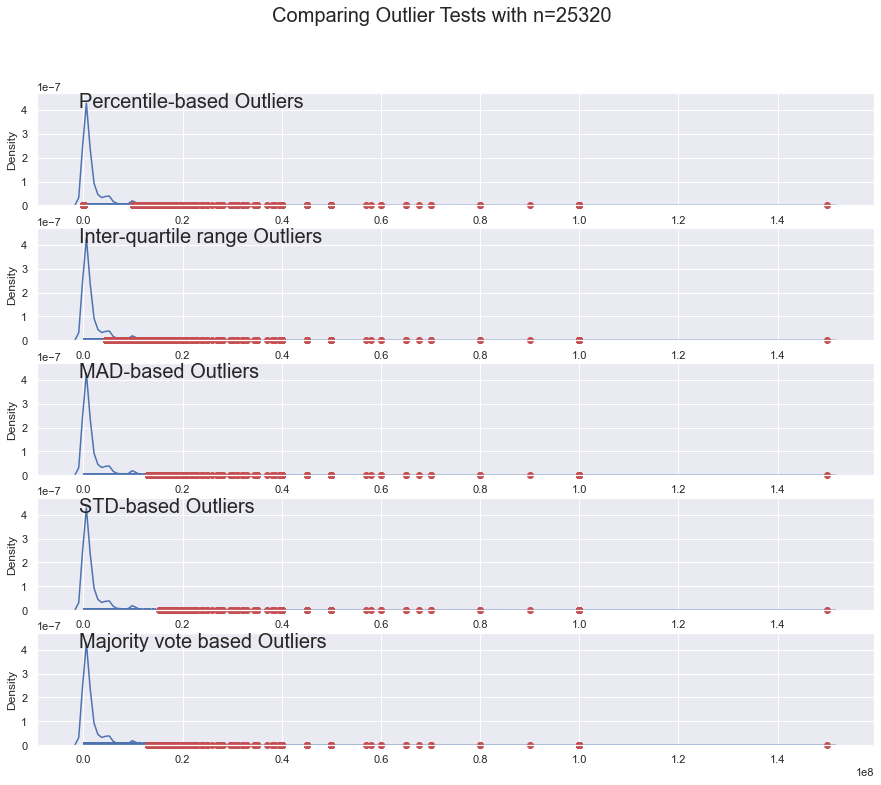

In [145]:
plotOutlier(np.array(df_train['Applicant\'s Policy Sum Assured']))

Detect the outliers from every columns which have outliers by using the above outlier detection functions. Almost all the models gave better result of the observations

## 3.5 Outliers Handling for Continuous columns

* Remove any records that are outliers. In the instance of a real outlier, it's occasionally advisable to eliminate that record entirely from your dataset to prevent that person or event from skewing your research.
* Data on outliers should be limited.
* Set a new value.
* Attempt a metamorphosis.
* In here we removed the outliers by replacing the maximum and minimum of the Outlier Vote value of that particular column where it's present.

In [147]:
x = df_train['Mapped Agent 13M Persistency'][outlierVote(np.array(df_train['Mapped Agent 13M Persistency'])) == True].max()
x

25.0

In [148]:
df_train['Mapped Agent 13M Persistency'][df_train['Mapped Agent 13M Persistency'] < x] = x

In [149]:
df_train['Applicant\'s Policy Annualized Premium'][outlierVote(np.array(df_train['Applicant\'s Policy Annualized Premium'])) == True].max()

2500000.0

In [150]:
x = df_train['Applicant\'s Policy Annualized Premium'][outlierVote(np.array(df_train['Applicant\'s Policy Annualized Premium'])) == True].min()
x

398120.0

In [151]:
df_train['Applicant\'s Policy Annualized Premium'][df_train['Applicant\'s Policy Annualized Premium'] > x] = x

In [152]:
x = df_train['Mapped Agent Vintage'][outlierVote(np.array(df_train['Mapped Agent Vintage'])) == True].min()
x

84.0

In [153]:
df_train['Mapped Agent Vintage'][df_train['Mapped Agent Vintage'] > x] = x

In [154]:
x = df_train['Application  Life Assured Age'][outlierVote(df_train['Application  Life Assured Age'])].max()
x

7.0

In [155]:
df_train['Application  Life Assured Age'][df_train['Application  Life Assured Age'] < x] = x

In [156]:
x = df_train['Application  Life Assured Income'][std_div(df_train['Application  Life Assured Income'],threshold=3)].min()
x

8400000.0

In [157]:
df_train['Application  Life Assured Income'][df_train['Application  Life Assured Income'] > 20000000] = 20000000

In [158]:
x = df_train['Applicant\'s Policy Risk Cessation Term'][outlierVote(np.array(df_train['Applicant\'s Policy Risk Cessation Term'])) == True].min()
x

40.0

In [159]:
df_train['Applicant\'s Policy Risk Cessation Term'].min()

5.0

In [160]:
df_train['Applicant\'s Policy Risk Cessation Term'][df_train['Applicant\'s Policy Risk Cessation Term'] > x] = x

In [161]:
x = df_train['Applicant\'s Policy Sum Assured'][outlierVote(np.array(df_train['Applicant\'s Policy Sum Assured'])) == True].min()
x

13000000.0

In [162]:
df_train['Applicant\'s Policy Sum Assured'][df_train['Applicant\'s Policy Sum Assured'] > x] = x

## 3.6 Categorical Variables Handling

In [164]:
y = df_train['Application Specific Sourcing Partner'].value_counts() < 50
y.index

Index(['HDFC BANK', 'HDFC Sales Private Limited', 'HDFC SECURITIES LIMITED',
       'RBL Bank Ltd', 'DUMMY HDFC BANK UPSELL',
       'Equitas Small Finance Bank Ltd', 'IDFC First Bank Limited',
       'BAJAJ FINANCE LIMITED', 'Bajaj Capital Insurance Brokin',
       'THE SARASWAT CO-OPERATIVE BANK',
       ...
       'EASY LIFE INITIATIVE IMF PVT.', 'Security Insurance Brokers (In',
       'Coretree Insurance Brokers (In', 'ZENMONEY INSURANCE BROKING SER',
       'Goldkey Insurance Brokers Pvt.', 'MPN Capital Services Private l',
       'PURPLE POND INSURANCE BROKERS', 'INTUIT WEALTH IMF PVT.LTD.',
       'EF Insurance Broking Pvt.Ltd', 'Dena Bank'],
      dtype='object', length=126)

In [165]:
df_train['Application Specific Sourcing Partner']

0                         HDFC BANK
1                         HDFC BANK
2        HDFC Sales Private Limited
3                         HDFC BANK
4                         HDFC BANK
                    ...            
25315    HDFC Sales Private Limited
25316    HDFC Sales Private Limited
25317        DUMMY HDFC BANK UPSELL
25318    HDFC Sales Private Limited
25319                     HDFC BANK
Name: Application Specific Sourcing Partner, Length: 25320, dtype: object

<AxesSubplot:>

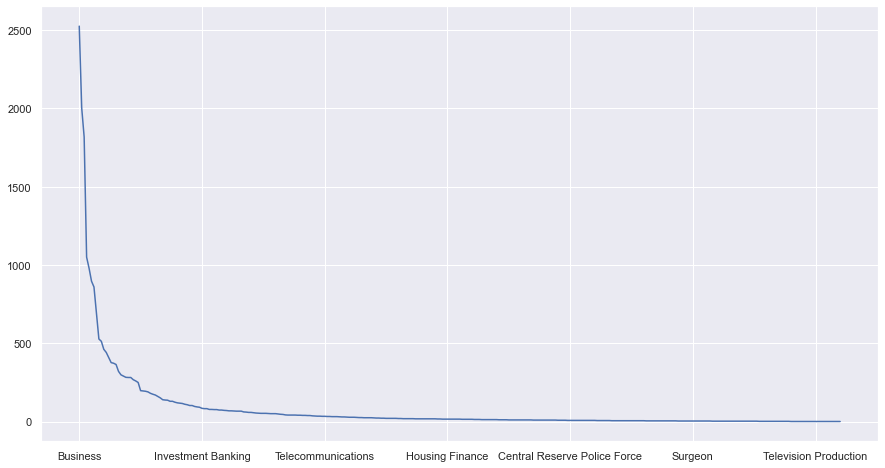

In [166]:
plt.figure(figsize=(15,8))
df_train['Application  Life Assured Industry'].value_counts().plot()

In [168]:
df_train[['Mapped Agent Branch', 'Application Life Assured Alcohol Declaration',
       'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Applicant\'s  Policy Contract Branch',
       'Application  Life Assured Education',
        'Application  Life Assured City Tier',
       'Application  Life Assured Gender',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Nationality',
       'Application  Life Assured Occupation',
       'Applicant\'s Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant\'s Policy Product Category',
       'Applicant\'s Policy Premium Payment Frequency',
       'Applicant\'s Policy Product Name', 'Application Login Date',
       'Application Life Assured Residential Status',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

,Mapped Agent Branch,Application Life Assured Alcohol Declaration,Auto Debit of Premium Opted Flag(Yes/No),Application Sourcing Channel,Application Life Assured City,Applicant's Policy Contract Branch,Application Life Assured Education,Application Life Assured City Tier,Application Life Assured Gender,Application Life Assured Industry,...,First Premium Payment Type,Applicant's Policy Product Category,Applicant's Policy Premium Payment Frequency,Applicant's Policy Product Name,Application Login Date,Application Life Assured Residential Status,Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,HDFC Life Operational Zone
0,Delhi - Asaf Ali Road,N,Y,HDFC BANK,bangalore,Delhi - Nehru Place,Graduation,Tier I,Female,Trading,...,"ECS,SI",Protection,Annual,HDFC Life Click 2 Protect 3D+,2018-07-07,Resident Indian,N,Karnataka,HDFC BANK,North 1
1,Ahmedabad Vastrapur Branch,N,N,HDFC BANK,Navsari,Ahmedabad - Vastrapur,S S C,Tier III,Male,Building Materials,...,Online Credit/Debit Card/Teles Sales,Savings,Annual,HDFC Life Super Income Plan,2018-03-31,Resident Indian,N,Gujarat,HDFC BANK,West
2,Jaipur-Tonk Road,N,Y,Ex-HDFC,jaipur,Jaipur-Tonk Road,B A,Tier II,Male,Service,...,Cheque,Investment,Monthly Premium,HDFC SL ProGrowth - Flexi,2018-06-09,Resident Indian,N,Rajasthan,HDFC Sales,North 2
3,Jaipur-Tonk Road,N,Y,HDFC BANK,Jaipur,Mumbai - Bkc,Post Graduation,Tier II,Male,Teaching,...,DD,Investment,Monthly Premium,HDFC Life ProGrowth Plus,2018-02-21,Resident Indian,N,Rajasthan,HDFC BANK,North 2
4,Bhavnagar - Patni Plaza,N,Y,HDFC BANK,botad,Bhavnagar - Patni Plaza,S S C,Tier III,Male,Labour,...,"ECS,SI",Childrens Plan,Annual,HDFC YOUNGSTAR SUPER PREMIUM,2018-06-06,Resident Indian,N,Gujarat,HDFC BANK,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25315,Ambala - Nicholson Road,N,N,Ex-HDFC,yamuna nagar,Karnal - Narayan Plaza,B A,Tier III,Male,Business,...,Cheque,Investment,Annual,HDFC Life ProGrowth Plus,2018-09-26,Resident Indian,N,Haryana,HDFC Sales,North 1
25316,Indore - Vijay Nagar,N,N,Ex-HDFC,indore,Indore - Vijay Nagar,Graduation,Tier II,Male,Pharmaceutials,...,DD,Investment,Monthly Premium,HDFC Life ProGrowth Plus,2018-10-11,Resident Indian,N,Madhya Pradesh,HDFC Sales,East
25317,Jalandhar - Shoppers Square,N,N,HDFC BANK,jalandhar,Jalandhar - Shoppers Square,S S C,Tier II,Female,Agriculture,...,"ECS,SI",Investment,Annual,HDFC SL ProGrowth - Flexi,2018-10-20,Resident Indian,N,Punjab,HDFC BANK Upsell,North 1
25318,Kanpur - Swaroop Nagar,N,N,Ex-HDFC,Jhansi,Kanpur - Js Tower,MBA,Tier III,Male,Real Estate,...,DD,Investment,Annual,HDFC SL ProGrowth - Flexi,2018-09-03,Resident Indian,N,Uttar Pradesh,HDFC Sales,North 2


Below are the value counts of each categorical columns.

In [169]:
df_train['Applicant\'s  Policy Contract Branch'].value_counts()

Chennai - T. Nagar          1158
Delhi - Mayur Vihar          797
Mumbai - Bkc                 732
Pune - Nandadeep Fc Road     701
Delhi - Paschim Vihar        627
                            ... 
Chitoor - Tirupathi Road       1
Hamirpur                       1
Balotra - Nayapura             1
Ratnagiri - Paras Plaza        1
Warangal - Nakkalgutta         1
Name: Applicant's  Policy Contract Branch, Length: 370, dtype: int64

In [170]:
df_train['Mapped Agent Branch'].value_counts()

Chennai - T Nagar               1157
Delhi - Mayur Vihar              816
Pune City Mall                   730
Ahmedabad Vastrapur Branch       577
Hyderabad - Begumpet             569
                                ... 
Delhi - Ashok Vihar                1
Arrah-Spoke                        1
Malda - Krishna Pally              1
Ratnagiri - Paras Plaza            1
Changanacherry - Angel Plaza       1
Name: Mapped Agent Branch, Length: 372, dtype: int64

In [171]:
df_train['Application  Life Assured Education'].value_counts()

Graduation    4737
B A           4126
S S C         2132
H S C         2045
B Com         1909
              ... 
BUMS             2
M.Ch             2
MPY              1
PBM              1
CFA              1
Name: Application  Life Assured Education, Length: 64, dtype: int64

In [172]:
df_train['Application Login Date'].value_counts()

2018-03-31    245
2018-03-29    238
2018-03-26    185
2018-03-21    179
2018-03-27    175
             ... 
2019-04-02      1
2017-10-27      1
2018-08-04      1
2017-10-12      1
2017-12-17      1
Name: Application Login Date, Length: 448, dtype: int64

In [173]:
df_train['Application  Life Assured Nationality'].value_counts()

Indian    25320
Name: Application  Life Assured Nationality, dtype: int64

In [276]:
df_train['Application  Life Assured Occupation'].value_counts()

Salaried                   11605
Self employed/ Business    11379
Agriculture                 1617
Others                       690
Student                       25
Unemployed                     3
Housewife                      1
Name: Application  Life Assured Occupation, dtype: int64

In [175]:
df_train['Applicant\'s Policy PAR/NON PAR/ULIP Tag'].value_counts()

UL         18366
Par         3696
Non Par     3258
Name: Applicant's Policy PAR/NON PAR/ULIP Tag, dtype: int64

In [176]:
df_train['First Premium Payment Type'].value_counts()

DD                                      9144
Cheque                                  7711
Online Credit/Debit Card/Teles Sales    3065
ECS,SI                                  3001
Online Netbanking                       1352
Online-Bill                              537
Journal Entry                            307
Credit Card Mandate                      190
Cash                                      13
Name: First Premium Payment Type, dtype: int64

In [177]:
df_train['Applicant\'s Policy Product Category'].value_counts()

Investment        17592
Savings            4406
Protection         2656
Childrens Plan      666
Name: Applicant's Policy Product Category, dtype: int64

In [178]:
df_train['Applicant\'s Policy Premium Payment Frequency'].value_counts()

Annual                23165
Monthly Premium        1225
Halfyearly Premium      813
Quarterly Premium       117
Name: Applicant's Policy Premium Payment Frequency, dtype: int64

In [179]:
df_train['Application Life Assured Residential Status'].value_counts()

Resident Indian    25308
NRI                   12
Name: Application Life Assured Residential Status, dtype: int64

In [180]:
df_train['Application Life Assured Smoker Declaration'].value_counts()

N    25111
Y      209
Name: Application Life Assured Smoker Declaration, dtype: int64

In [181]:
df_train['Application Life Assured State'].value_counts()

Maharashtra                  4115
Gujarat                      2561
Uttar Pradesh                2173
Punjab                       2145
Tamil Nadu                   1866
Delhi                        1725
Haryana                      1667
Rajasthan                    1281
Madhya Pradesh               1007
West Bengal                   971
Karnataka                     968
Kerala                        635
Telangana                     574
Chattisgarh                   448
Bihar                         446
Andhra Pradesh                420
Jharkhand                     402
Assam                         378
Odisha                        377
Uttarakhand                   288
Himachal Pradesh              225
Jammu & Kashmir               179
Chandigarh                    130
Goa                            96
Dadra & Nagar Haveli           61
Daman & Diu                    37
Pondicherry                    33
Tripura                        32
Meghalaya                      28
Sikkim        

In [182]:
df_train['Application Sourcing Sub Channel'].value_counts()

HDFC BANK                    16516
HDFC Sales                    3302
Brokers                       1367
HDFC Sec                       890
Ratnakar Bank                  809
HDFC BANK Upsell               656
Small CA                       401
NBFC & MFI - 1 Others          342
IDFC Bank                      266
Bajaj Fin Serv                 183
Saraswat Bank                  122
India Bulls                     86
Ujjvan SFB                      62
NBFC MFI 1 Upsell               54
Basin Catholic                  34
Chola                           28
IMF                             24
PSU Cooperative-Others          23
PSU                             22
CSB                             22
Suryoday SFB                    20
Apna Sahakari                   18
Vakrangee                       16
Other Banks and CA Upsell       14
Utkarsh SFB                     13
DNSB                             9
Vishweshwar Sahakari             7
Ex-HDFC Upsell                   7
Varthana            

In [183]:
df_train['HDFC Life Operational Zone'].value_counts()

West       6862
North 1    6826
East       4021
North 2    3070
South 1    2985
South 2    1556
Name: HDFC Life Operational Zone, dtype: int64

Pre-process the date column into year, month and date 

In [184]:
df_train['Application Login Date']

0        2018-07-07
1        2018-03-31
2        2018-06-09
3        2018-02-21
4        2018-06-06
            ...    
25315    2018-09-26
25316    2018-10-11
25317    2018-10-20
25318    2018-09-03
25319    2018-03-28
Name: Application Login Date, Length: 25320, dtype: object

In [185]:
df_train['Application Login year'] = df_train['Application Login Date'].apply(lambda x: x.split('-')[0])

In [186]:
df_train['Application Login year'].value_counts()

2018    23022
2019     1771
2017      527
Name: Application Login year, dtype: int64

In [187]:
df_train['Application Login month'] = df_train['Application Login Date'].apply(lambda x: x.split('-')[1])

In [188]:
df_train['Application Login month'].value_counts()

03    3209
01    3205
12    2868
09    1986
11    1977
06    1916
08    1880
02    1875
05    1721
07    1710
10    1638
04    1335
Name: Application Login month, dtype: int64

In [189]:
df_train['Application Login day'] = df_train['Application Login Date'].apply(lambda x: x.split('-')[2])

In [190]:
df_train['Application Login day'].value_counts()

01    1632
29    1259
30    1187
28    1155
31    1021
19     972
27     961
20     955
21     945
26     922
24     894
22     870
17     846
23     841
03     831
16     814
18     798
02     793
15     788
14     765
13     747
25     720
12     660
09     608
07     602
10     527
06     519
05     516
08     499
04     347
11     326
Name: Application Login day, dtype: int64

In [191]:
df_train.drop('Application Login Date', axis =1, inplace = True)

Seperate the city name from the whole address

In [193]:
df_train['Mapped Agent city'] = df_train['Mapped Agent Branch'].apply(lambda x: x.split(' ')[0])

In [194]:
df_train['Mapped Agent city'] = df_train['Mapped Agent city'].apply(lambda x: x.split('-')[0])

In [195]:
df_train['Mapped Agent city'].value_counts()

Delhi             2462
Mumbai            1877
Chennai           1511
Pune               872
Kolkata            802
                  ... 
Punalur              1
Palasa               1
Mandya               1
Changanacherry       1
Arrah                1
Name: Mapped Agent city, Length: 317, dtype: int64

From Applicant's Policy Contract Branch also seperate the city name

In [196]:
df_train['Applicant\'s Policy Contract city'] = df_train['Applicant\'s  Policy Contract Branch'].apply(lambda x: x.split(' ')[0])

In [197]:
df_train['Applicant\'s Policy Contract city'] = df_train['Applicant\'s Policy Contract city'].apply(lambda x: x.split('-')[0])

In [198]:
df_train['Applicant\'s Policy Contract city'].value_counts()

Mumbai       2377
Delhi        2310
Chennai      1231
Pune          841
Kolkata       793
             ... 
Palasa          1
Varkala         1
Balotra         1
Behrampur       1
Chitoor         1
Name: Applicant's Policy Contract city, Length: 316, dtype: int64

## 3.7 Preprocess or busketed other Insurance details related columns

In [200]:
df_train.head()

,Mapped Agent 13M Persistency,Mapped Agent Branch,Application Life Assured Alcohol Declaration,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,...,Application Life Assured State,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')",Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city
0,93.47,Delhi - Asaf Ali Road,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,bangalore,...,Karnataka,HDFC BANK,10000000.0,North 1,1,2018,07,07,Delhi,Delhi
1,81.59,Ahmedabad Vastrapur Branch,N,25000.0,42.0,N,28.34467,145501.0,HDFC BANK,Navsari,...,Gujarat,HDFC BANK,145501.0,West,1,2018,03,31,Ahmedabad,Ahmedabad
2,87.58,Jaipur-Tonk Road,N,35000.0,35.0,Y,21.87500,800000.0,Ex-HDFC,jaipur,...,Rajasthan,HDFC Sales,1600000.0,North 2,1,2018,06,09,Jaipur,Jaipur
3,80.18,Jaipur-Tonk Road,N,100000.0,12.0,Y,22.85714,1000000.0,HDFC BANK,Jaipur,...,Rajasthan,HDFC BANK,2000000.0,North 2,1,2018,02,21,Jaipur,Mumbai
4,97.19,Bhavnagar - Patni Plaza,N,15000.0,45.0,Y,20.70082,300000.0,HDFC BANK,botad,...,Gujarat,HDFC BANK,165000.0,West,1,2018,06,06,Bhavnagar,Bhavnagar


Seperated all the customers qualifications and concatenated into one with the commons

In [201]:
df_train['Application  Life Assured Education'].value_counts()

Graduation    4737
B A           4126
S S C         2132
H S C         2045
B Com         1909
              ... 
BUMS             2
M.Ch             2
MPY              1
PBM              1
CFA              1
Name: Application  Life Assured Education, Length: 64, dtype: int64

In [202]:
df_train['Application  Life Assured Education'].unique()

array(['Graduation', 'S S C', 'B A', 'Post Graduation', 'B E', 'MBBS',
       'M Sc', 'H S C', 'ITI', 'B Sc', 'B Com', 'MBA',
       'Diploma in Electrical Engineering', 'B Ed',
       'Under Matric (Class l to lX)', 'Diploma',
       'Diploma in Mechanical Engineering', 'M Pharm', 'BCA',
       'Diploma in Civil Engineering', 'B B A', 'M A', 'LLB', 'B Tech',
       'M Tech', 'DCE', 'D Ed', 'B M S', 'Others', 'CA', 'BAMS',
       'Illiterate', 'M E', 'ICWA', 'M S', 'MCM', 'MCA',
       'Diploma in Pharmacy', 'BDS', 'BHMS', 'M D', 'Master of Law',
       'PG Diploma Marketing management', 'PG Diploma  Business Admin',
       'Ph.D.', 'B Pharm', 'Diploma in General Nursing', 'MED', 'M. Phil',
       'Bachelor of Veterinary Science', 'Diploma in Fashion designing',
       'BAC', 'MPY', 'PharmD', 'DMLT',
       'Diploma in Instrumentation Engineering', 'MMS',
       'Diploma in Interior Designing', 'M. Arch.', 'DTE', 'M.Ch', 'PBM',
       'BUMS', 'CFA'], dtype=object)

In [203]:
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: x.strip())

In [204]:
dic = {'Under Metric' : ['Under Matric (Class l to lX)'], 
       'Graduation non-diploma' : ['Graduation','PharmD','BUMS','M D', 'DTE','PBM','ICWA'], 
       'Graduation Diploma' : ['Diploma in Electrical Engineering','Diploma in Mechanical Engineering','Diploma in Civil Engineering',
                   'Diploma in Pharmacy','Diploma in General Nursing','Diploma in Fashion designing','Diploma in Instrumentation Engineering',
       'Diploma in Interior Designing','D Ed','Diploma','DCE','DMLT'], 'PG Diploma' : ['PG Diploma Marketing management','PG Diploma  Business Admin'],
       'Masters':['M Sc','MBA','M Pharm','M A','M Tech','M E','M S','MCM', 'MCA','Master of Law',
                  'M. Arch.','M.Ch','MMS','MPY','MED','M. Phil'],
       'Bachelors':['B A','B E','MBBS','B Sc','B Com','BCA','B B A','B Tech','Bachelor of Veterinary Science','B Ed',
                    'B Pharm','BAMS','BHMS','B M S','BDS','LLB','BAC'],
       'Class9to12':['S S C','H S C'],
       'PhD':['Ph.D.'],
       'PG Certification': ['CFA','CA'],
       'G Certification': 'ITI'
      }

In [205]:
print([(dic[k]) for k in dic])

[['Under Matric (Class l to lX)'], ['Graduation', 'PharmD', 'BUMS', 'M D', 'DTE', 'PBM', 'ICWA'], ['Diploma in Electrical Engineering', 'Diploma in Mechanical Engineering', 'Diploma in Civil Engineering', 'Diploma in Pharmacy', 'Diploma in General Nursing', 'Diploma in Fashion designing', 'Diploma in Instrumentation Engineering', 'Diploma in Interior Designing', 'D Ed', 'Diploma', 'DCE', 'DMLT'], ['PG Diploma Marketing management', 'PG Diploma  Business Admin'], ['M Sc', 'MBA', 'M Pharm', 'M A', 'M Tech', 'M E', 'M S', 'MCM', 'MCA', 'Master of Law', 'M. Arch.', 'M.Ch', 'MMS', 'MPY', 'MED', 'M. Phil'], ['B A', 'B E', 'MBBS', 'B Sc', 'B Com', 'BCA', 'B B A', 'B Tech', 'Bachelor of Veterinary Science', 'B Ed', 'B Pharm', 'BAMS', 'BHMS', 'B M S', 'BDS', 'LLB', 'BAC'], ['S S C', 'H S C'], ['Ph.D.'], ['CFA', 'CA'], 'ITI']


In [206]:
for k in dic: print(k)

Under Metric
Graduation non-diploma
Graduation Diploma
PG Diploma
Masters
Bachelors
Class9to12
PhD
PG Certification
G Certification


In [207]:
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'Under Metric' if x in dic['Under Metric'] else x)
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'Graduation non-diploma' if x in dic['Graduation non-diploma'] else x)
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'Graduation Diploma' if x in dic['Graduation Diploma'] else x)
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'PG Diploma' if x in dic['PG Diploma'] else x)
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'Masters' if x in dic['Masters'] else x)
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'Bachelors' if x in dic['Bachelors'] else x)
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'Class9to12' if x in dic['Class9to12'] else x)
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'PhD' if x in dic['PhD'] else x)
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'PG Certification' if x in dic['PG Certification'] else x)
df_train['Application  Life Assured Education'] = df_train['Application  Life Assured Education'].apply(lambda x: 'G Certification' if x in dic['G Certification'] else x)

In [208]:
# Check the counts of all the education qualifications
df_train['Application  Life Assured Education'].value_counts()

Bachelors                 9390
Graduation non-diploma    4875
Class9to12                4177
Masters                   2669
Under Metric              1426
Post Graduation           1194
Graduation Diploma         715
Others                     355
PG Certification           154
G Certification            149
PhD                        142
PG Diploma                  55
Illiterate                  19
Name: Application  Life Assured Education, dtype: int64

In [209]:
df_train['Application  Life Assured Education'].unique()

array(['Graduation non-diploma', 'Class9to12', 'Bachelors',
       'Post Graduation', 'Masters', 'G Certification',
       'Graduation Diploma', 'Under Metric', 'Others', 'PG Certification',
       'Illiterate', 'PG Diploma', 'PhD'], dtype=object)

Now seperating all the categorical columns values on a particular threhold otherwise we are implementng as others. This is done for the values in the columns which is useful. If the values majority is more then it will give better predictions.

In [210]:
x = df_train['Applicant\'s Policy Contract city'].value_counts() < 350 

In [211]:
y = x.index[x == False]

In [212]:
df_train['Applicant\'s Policy Contract city'] = df_train['Applicant\'s Policy Contract city'].apply(lambda x: x if x in y else 'others')

In [213]:
df_train['Applicant\'s Policy Contract city'].value_counts()

others        13664
Mumbai         2377
Delhi          2310
Chennai        1231
Pune            841
Kolkata         793
Bangalore       677
Ahmedabad       585
Hyderabad       566
Chandigarh      533
Jaipur          526
Gurgaon         474
Surat           379
Indore          364
Name: Applicant's Policy Contract city, dtype: int64

In [214]:
x = df_train['Mapped Agent city'].value_counts() < 550

In [215]:
y = x.index[x == False]

In [216]:
df_train['Mapped Agent city'] = df_train['Mapped Agent city'].apply(lambda x: x if x in y else 'others')

In [217]:
df_train['Mapped Agent city'].value_counts()

others        14874
Delhi          2462
Mumbai         1877
Chennai        1511
Pune            872
Kolkata         802
Ahmedabad       642
Bangalore       600
Hyderabad       578
Chandigarh      552
Jaipur          550
Name: Mapped Agent city, dtype: int64

In [218]:
x = df_train['Application Sourcing Sub Channel'].value_counts() < 400 

In [219]:
y = x.index[x == False]

In [220]:
df_train['Application Sourcing Sub Channel'] = df_train['Application Sourcing Sub Channel'].apply(lambda x: x if x in y else 'others')

In [221]:
df_train['Application Sourcing Sub Channel'].value_counts()

HDFC BANK           16516
HDFC Sales           3302
others               1379
Brokers              1367
HDFC Sec              890
Ratnakar Bank         809
HDFC BANK Upsell      656
Small CA              401
Name: Application Sourcing Sub Channel, dtype: int64

In [222]:
x = df_train['Application Life Assured State'].value_counts() < 600

In [223]:
y = x.index[x == False]

In [224]:
df_train['Application Life Assured State'] = df_train['Application Life Assured State'].apply(lambda x: x if x in y else 'others')

In [225]:
df_train['Application Life Assured State'].value_counts()

others            4206
Maharashtra       4115
Gujarat           2561
Uttar Pradesh     2173
Punjab            2145
Tamil Nadu        1866
Delhi             1725
Haryana           1667
Rajasthan         1281
Madhya Pradesh    1007
West Bengal        971
Karnataka          968
Kerala             635
Name: Application Life Assured State, dtype: int64

In [226]:
x = df_train['Application  Life Assured Industry'].value_counts() < 500

In [227]:
y = x.index[x == False]

In [228]:
df_train['Application  Life Assured Industry'] = df_train['Application  Life Assured Industry'].apply(lambda x: x if x in y else 'others')

In [229]:
df_train['Application  Life Assured Industry'].value_counts()

others               13448
Business              2526
Agriculture           2004
Service               1818
Manufacturing         1051
Teaching               980
Trading                897
Education              860
Accounts               695
Government Sector      528
IT Industry            513
Name: Application  Life Assured Industry, dtype: int64

In [230]:
df_train = df_train.drop('Applicant\'s  Policy Contract Branch', axis = 1)

In [231]:
df_train['Applicant\'s Policy Contract city'].value_counts()

others        13664
Mumbai         2377
Delhi          2310
Chennai        1231
Pune            841
Kolkata         793
Bangalore       677
Ahmedabad       585
Hyderabad       566
Chandigarh      533
Jaipur          526
Gurgaon         474
Surat           379
Indore          364
Name: Applicant's Policy Contract city, dtype: int64

In [232]:
df_train = df_train.drop('Mapped Agent Branch', axis = 1)

In [233]:
df_train = df_train.drop('Application  Life Assured Nationality', axis = 1)

In [234]:
df_train['Applicant\'s Policy Contract city'].value_counts()

others        13664
Mumbai         2377
Delhi          2310
Chennai        1231
Pune            841
Kolkata         793
Bangalore       677
Ahmedabad       585
Hyderabad       566
Chandigarh      533
Jaipur          526
Gurgaon         474
Surat           379
Indore          364
Name: Applicant's Policy Contract city, dtype: int64

In [235]:
df_train['Application  Life Assured City'] = df_train['Application  Life Assured City'].apply(lambda x : x.lower())

In [236]:
x = df_train['Application  Life Assured City'].value_counts() < 300

In [237]:
y = x.index[x == False]

In [238]:
df_train['Application  Life Assured City'] = df_train['Application  Life Assured City'].apply(lambda x: x if x in y else 'others')

In [239]:
df_train['Application  Life Assured City'].value_counts()

others       18136
mumbai        1142
chennai        773
delhi          675
pune           650
new delhi      607
bangalore      547
kolkata        505
ahmedabad      446
surat          390
thane          377
jaipur         358
hyderabad      358
gurgaon        356
Name: Application  Life Assured City, dtype: int64

In [240]:
df_train[['Application Life Assured Alcohol Declaration',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Application  Life Assured Education',
        'Application  Life Assured City Tier',
       'Application  Life Assured Gender',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Occupation',
       'Applicant\'s Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant\'s Policy Product Category',
       'Applicant\'s Policy Premium Payment Frequency',
       'Applicant\'s Policy Product Name',
       'Application Life Assured Residential Status',
       'Application Life Assured Smoker Declaration',
       'Application Life Assured State', 'Application Sourcing Sub Channel',
       'HDFC Life Operational Zone']]

,Application Life Assured Alcohol Declaration,Application Sourcing Channel,Application Life Assured City,Application Life Assured Education,Application Life Assured City Tier,Application Life Assured Gender,Application Life Assured Industry,Application Life Assured Marital Status,Application Life Assured Occupation,Applicant's Policy PAR/NON PAR/ULIP Tag,Application Specific Sourcing Partner,First Premium Payment Type,Applicant's Policy Product Category,Applicant's Policy Premium Payment Frequency,Applicant's Policy Product Name,Application Life Assured Residential Status,Application Life Assured Smoker Declaration,Application Life Assured State,Application Sourcing Sub Channel,HDFC Life Operational Zone
0,N,HDFC BANK,bangalore,Graduation non-diploma,Tier I,Female,Trading,Single,Salaried,Non Par,HDFC BANK,"ECS,SI",Protection,Annual,HDFC Life Click 2 Protect 3D+,Resident Indian,N,Karnataka,HDFC BANK,North 1
1,N,HDFC BANK,others,Class9to12,Tier III,Male,others,Married,Self employed/ Business,Par,HDFC BANK,Online Credit/Debit Card/Teles Sales,Savings,Annual,HDFC Life Super Income Plan,Resident Indian,N,Gujarat,HDFC BANK,West
2,N,Ex-HDFC,jaipur,Bachelors,Tier II,Male,Service,Married,Self employed/ Business,UL,HDFC Sales Private Limited,Cheque,Investment,Monthly Premium,HDFC SL ProGrowth - Flexi,Resident Indian,N,Rajasthan,HDFC Sales,North 2
3,N,HDFC BANK,jaipur,Post Graduation,Tier II,Male,Teaching,Married,Salaried,UL,HDFC BANK,DD,Investment,Monthly Premium,HDFC Life ProGrowth Plus,Resident Indian,N,Rajasthan,HDFC BANK,North 2
4,N,HDFC BANK,others,Class9to12,Tier III,Male,others,Married,Self employed/ Business,UL,HDFC BANK,"ECS,SI",Childrens Plan,Annual,HDFC YOUNGSTAR SUPER PREMIUM,Resident Indian,N,Gujarat,HDFC BANK,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25315,N,Ex-HDFC,others,Bachelors,Tier III,Male,Business,Married,Self employed/ Business,UL,HDFC Sales Private Limited,Cheque,Investment,Annual,HDFC Life ProGrowth Plus,Resident Indian,N,Haryana,HDFC Sales,North 1
25316,N,Ex-HDFC,others,Graduation non-diploma,Tier II,Male,others,Married,Salaried,UL,HDFC Sales Private Limited,DD,Investment,Monthly Premium,HDFC Life ProGrowth Plus,Resident Indian,N,Madhya Pradesh,HDFC Sales,East
25317,N,HDFC BANK,others,Class9to12,Tier II,Female,Agriculture,Married,Agriculture,UL,DUMMY HDFC BANK UPSELL,"ECS,SI",Investment,Annual,HDFC SL ProGrowth - Flexi,Resident Indian,N,Punjab,HDFC BANK Upsell,North 1
25318,N,Ex-HDFC,others,Masters,Tier III,Male,others,Married,Salaried,UL,HDFC Sales Private Limited,DD,Investment,Annual,HDFC SL ProGrowth - Flexi,Resident Indian,N,Uttar Pradesh,HDFC Sales,North 2


In [241]:
df_train.head()

,Mapped Agent 13M Persistency,Application Life Assured Alcohol Declaration,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,...,Application Life Assured State,Application Sourcing Sub Channel,Applicant's Policy Sum Assured,HDFC Life Operational Zone,"Target - Paid Premium Within 90 Days of Due Date Flag(1-'Yes', 0-'No')",Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city
0,93.47,N,7157.0,33.0,Y,16.22784,10000000.0,HDFC BANK,bangalore,Tier I,...,Karnataka,HDFC BANK,10000000.0,North 1,1,2018,07,07,Delhi,Delhi
1,81.59,N,25000.0,42.0,N,28.34467,145501.0,HDFC BANK,others,Tier III,...,Gujarat,HDFC BANK,145501.0,West,1,2018,03,31,Ahmedabad,Ahmedabad
2,87.58,N,35000.0,35.0,Y,21.87500,800000.0,Ex-HDFC,jaipur,Tier II,...,Rajasthan,HDFC Sales,1600000.0,North 2,1,2018,06,09,Jaipur,Jaipur
3,80.18,N,100000.0,12.0,Y,22.85714,1000000.0,HDFC BANK,jaipur,Tier II,...,Rajasthan,HDFC BANK,2000000.0,North 2,1,2018,02,21,Jaipur,Mumbai
4,97.19,N,15000.0,45.0,Y,20.70082,300000.0,HDFC BANK,others,Tier III,...,Gujarat,HDFC BANK,165000.0,West,1,2018,06,06,others,others


In [242]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25320 entries, 0 to 25319
Data columns (total 38 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   Mapped Agent 13M Persistency                                            25320 non-null  float64
 1   Application Life Assured Alcohol Declaration                            25320 non-null  object 
 2   Applicant's Policy Annualized Premium                                   25320 non-null  float64
 3   Mapped Agent Vintage                                                    25320 non-null  float64
 4   Auto Debit of Premium Opted Flag(Yes/No)                                25320 non-null  object 
 5   Application Life Assured BMI                                            25320 non-null  float64
 6   Total Risk Exposure of HDFC Life w.r.t. Life Assured                    25320 

In [243]:
df_train['Application  Life Assured Income'][df_train['Application  Life Assured Income'] < 500000] = 500000

In [244]:
df_train['Applicant\'s Policy Annualized Premium'].describe()

count     25320.000000
mean      63951.438191
std       71732.712038
min        3079.000000
25%       25000.000000
50%       48000.000000
75%       75000.000000
max      398120.000000
Name: Applicant's Policy Annualized Premium, dtype: float64

In here we are tranforming some of the columns. Essentially, we use cut and qcut to turn a numerical column into a categorical one, maybe to make it more suitable for a machine learning model (in the case of a very skewed numerical column) or just to better analyse the data at hand. After transforming we are checking the value counts of the columns also.

In [245]:
pd.qcut(df_train['Applicant\'s Policy Annualized Premium'],q=[0, .2, .4, .6, .8, 1],labels=False,precision=0).value_counts()

0    7667
2    7159
4    4963
3    2955
1    2576
Name: Applicant's Policy Annualized Premium, dtype: int64

In [246]:
df_train['Application  Life Assured Age'].describe(percentiles=[0, 1/2, 8/9, 1])

count    25320.000000
mean        41.504858
std         11.029526
min          7.000000
0%           7.000000
50%         41.000000
88.9%       56.000000
100%        66.000000
max         66.000000
Name: Application  Life Assured Age, dtype: float64

In [247]:
df_train['Application  Life Assured Age'] = pd.qcut(df_train['Application  Life Assured Age'], q=4)

In [249]:
df_train['Application Life Assured BMI'][df_train['Application Life Assured BMI'] > 40] = 40

In [250]:
df_train['Application Life Assured BMI'].describe(percentiles=[0, 1/9, 2/3, 8/9, 1])

count    25320.000000
mean        24.087491
std          2.762549
min          7.324220
0%           7.324220
11.1%       21.096190
50%         23.875430
66.7%       24.913490
88.9%       27.181630
100%        40.000000
max         40.000000
Name: Application Life Assured BMI, dtype: float64

In [251]:
df_train['Application Life Assured BMI'][df_train['Application Life Assured BMI'] <= 18.5] = 1

In [252]:
df_train['Application Life Assured BMI'] = df_train['Application Life Assured BMI'].apply(lambda x: 2 if x <= 24.9 and x > 18.5 else x)

In [253]:
df_train['Application Life Assured BMI'] = df_train['Application Life Assured BMI'].apply(lambda x: 3 if x < 29.9 and x >= 24.901 else x)

In [254]:
df_train['Application Life Assured BMI'] = df_train['Application Life Assured BMI'].apply(lambda x: 4 if x < 40 and x > 29.91 else x)

In [255]:
df_train['Application Life Assured BMI'].value_counts()

2.0     16417
3.0      7768
4.0       697
1.0       396
40.0       42
Name: Application Life Assured BMI, dtype: int64

In [256]:
df_train['Mapped Agent Vintage'][df_train['Mapped Agent Vintage'] < 0] = 0

In [257]:
df_train['Mapped Agent Vintage'].describe()

count    25320.000000
mean        24.390877
std         18.032084
min          0.000000
25%         11.000000
50%         20.000000
75%         34.000000
max         84.000000
Name: Mapped Agent Vintage, dtype: float64

In [258]:
pd.qcut(df_train['Mapped Agent Vintage'], q=4).value_counts()

(-0.001, 11.0]    6605
(20.0, 34.0]      6442
(11.0, 20.0]      6337
(34.0, 84.0]      5936
Name: Mapped Agent Vintage, dtype: int64

In [259]:
df_train['Applicant\'s Policy Risk Cessation Term'].describe(percentiles=[0, 1/2, 8/9, 1])

count    25320.000000
mean        13.530292
std          7.217959
min          5.000000
0%           5.000000
50%         10.000000
88.9%       20.000000
100%        40.000000
max         40.000000
Name: Applicant's Policy Risk Cessation Term, dtype: float64

In [260]:
pd.qcut(df_train['Applicant\'s Policy Risk Cessation Term'],q=[0, 1/2, 8/9, 1],labels=False,precision=0).value_counts()

0    16462
1     6615
2     2243
Name: Applicant's Policy Risk Cessation Term, dtype: int64

In [261]:
df_train['Applicant\'s Policy Sum Assured'].describe(percentiles=[0, 1/3, 1/2, 2/3, 1])

count    2.532000e+04
mean     1.817953e+06
std      2.685334e+06
min      2.906100e+04
0%       2.906100e+04
33.3%    5.000000e+05
50%      7.000000e+05
66.7%    1.050000e+06
100%     1.300000e+07
max      1.300000e+07
Name: Applicant's Policy Sum Assured, dtype: float64

In [262]:
pd.qcut(df_train['Applicant\'s Policy Sum Assured'],q=[0, 1/3, 1/2, 2/3, 1],labels=False,precision=0).value_counts()

0    10445
3     8395
2     3832
1     2648
Name: Applicant's Policy Sum Assured, dtype: int64

In [263]:
df_train['Target'] = df_train['Target - Paid Premium Within 90 Days of Due Date Flag(1-\'Yes\', 0-\'No\')']

In [264]:
df_train = df_train.drop('Target - Paid Premium Within 90 Days of Due Date Flag(1-\'Yes\', 0-\'No\')', axis =1)

In [265]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25320 entries, 0 to 25319
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype   
---  ------                                                 --------------  -----   
 0   Mapped Agent 13M Persistency                           25320 non-null  float64 
 1   Application Life Assured Alcohol Declaration           25320 non-null  object  
 2   Applicant's Policy Annualized Premium                  25320 non-null  float64 
 3   Mapped Agent Vintage                                   25320 non-null  float64 
 4   Auto Debit of Premium Opted Flag(Yes/No)               25320 non-null  object  
 5   Application Life Assured BMI                           25320 non-null  float64 
 6   Total Risk Exposure of HDFC Life w.r.t. Life Assured   25320 non-null  float64 
 7   Application  Sourcing Channel                          25320 non-null  object  
 8   Application  Life Assured City      

In [266]:
df_train['smoker_drinker'] = df_train['Application Life Assured Alcohol Declaration'] + df_train['Application Life Assured Smoker Declaration']

In [267]:
df_train['smoker_drinker'].value_counts()

NN    24902
YN      209
NY      111
YY       98
Name: smoker_drinker, dtype: int64

In [268]:
df_train = df_train.drop(['Application Life Assured Alcohol Declaration','Application Life Assured Smoker Declaration'], axis = 1)

In [269]:
NonPayers  = df_train[df_train['Target'] == 0]

In [270]:
NonPayers.columns

Index(['Mapped Agent 13M Persistency', 'Applicant's Policy Annualized Premium',
       'Mapped Agent Vintage', 'Auto Debit of Premium Opted Flag(Yes/No)',
       'Application Life Assured BMI',
       'Total Risk Exposure of HDFC Life w.r.t. Life Assured',
       'Application  Sourcing Channel', 'Application  Life Assured City',
       'Application  Life Assured City Tier', 'Application  Life Assured Age',
       'Application  Life Assured Education',
       'Application  Life Assured Gender', 'Application  Life Assured Income',
       'Application  Life Assured Industry',
       'Application  Life Assured Marital Status',
       'Application  Life Assured Occupation',
       'Applicant's Policy PAR/NON PAR/ULIP Tag',
       'Application Specific Sourcing Partner', 'First Premium Payment Type',
       'Applicant's Policy Product Category',
       'Applicant's Policy Premium Payment Frequency',
       'Applicant's Policy Product Name',
       'Applicant's Policy Price Sensitivity(1-'Yes

In [271]:
NonPayers['Mapped Agent 13M Persistency'].mean()

76.34366327804177

In [272]:
df_train['Mapped Agent 13M Persistency'].mean()

77.80800513427117

In [273]:
df_train['Perf+vintage'] = df_train['Mapped Agent 13M Persistency'] * df_train ['Mapped Agent Vintage']

In [274]:
df_train.head()

,Mapped Agent 13M Persistency,Applicant's Policy Annualized Premium,Mapped Agent Vintage,Auto Debit of Premium Opted Flag(Yes/No),Application Life Assured BMI,Total Risk Exposure of HDFC Life w.r.t. Life Assured,Application Sourcing Channel,Application Life Assured City,Application Life Assured City Tier,Application Life Assured Age,...,Applicant's Policy Sum Assured,HDFC Life Operational Zone,Application Login year,Application Login month,Application Login day,Mapped Agent city,Applicant's Policy Contract city,Target,smoker_drinker,Perf+vintage
0,93.47,7157.0,33.0,Y,1.0,10000000.0,HDFC BANK,bangalore,Tier I,"(6.999, 33.0]",...,10000000.0,North 1,2018,07,07,Delhi,Delhi,1,NN,3084.51
1,81.59,25000.0,42.0,N,3.0,145501.0,HDFC BANK,others,Tier III,"(41.0, 50.0]",...,145501.0,West,2018,03,31,Ahmedabad,Ahmedabad,1,NN,3426.78
2,87.58,35000.0,35.0,Y,2.0,800000.0,Ex-HDFC,jaipur,Tier II,"(50.0, 66.0]",...,1600000.0,North 2,2018,06,09,Jaipur,Jaipur,1,NN,3065.30
3,80.18,100000.0,12.0,Y,2.0,1000000.0,HDFC BANK,jaipur,Tier II,"(6.999, 33.0]",...,2000000.0,North 2,2018,02,21,Jaipur,Mumbai,1,NN,962.16
4,97.19,15000.0,45.0,Y,2.0,300000.0,HDFC BANK,others,Tier III,"(33.0, 41.0]",...,165000.0,West,2018,06,06,others,others,1,NN,4373.55


Saving the preprocessed train data for model building and predictions on the test data

In [275]:
df_train.to_csv('E:/PIP_Devmallya/Week_1/Problem_2/Final_data.csv', index = False)